In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from res.plot_lib import plot_data, plot_model

C:\Users\wonde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# INF554: Lab 7

# Introduction to PyTorch and Convolutional Neural Networks

In this lab we will learn to use <a href="https://pytorch.org/">PyTorch</a> to build more complex neural networks, such as Convolutional Neural Networks.

The fondamental data structure in PyTorch are <a href="https://pytorch.org/docs/stable/tensors.html#torch.Tensor">Tensors</a>. If you are familiar with Numpy arrays, you will find it easy to adapt to work with tensors. You may also take a look at the [tensor_tutorial](extras/tensor_tutorial.ipynb) for some examples.

Let's generate some data:

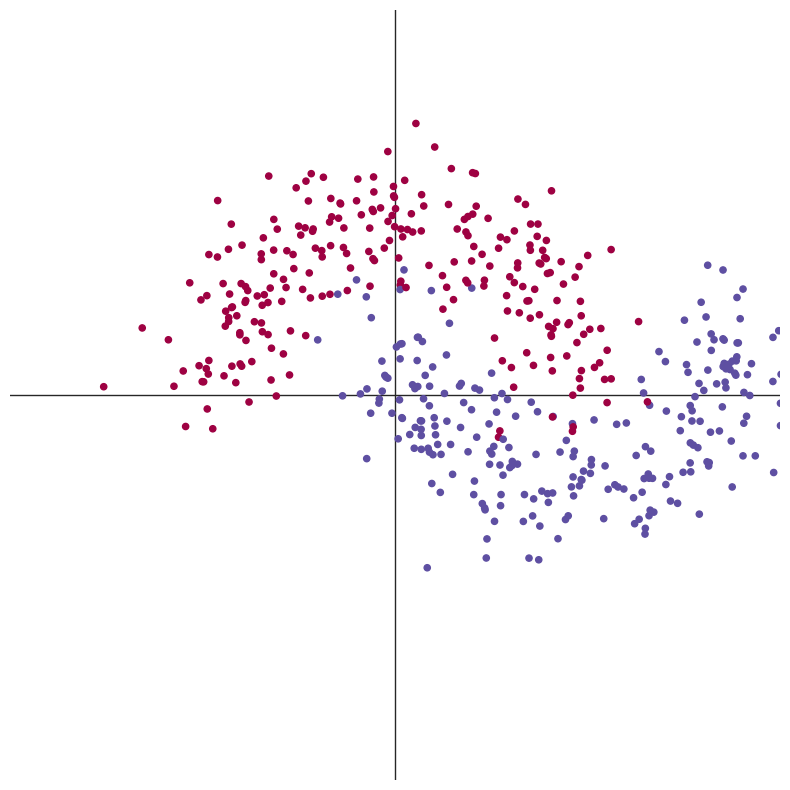

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #if you have a GPU with CUDA installed, this may speed up computation

#let's generate some data
X, Y = make_moons(n_samples=500, noise=.2)

plot_data(torch.from_numpy(X).float(), torch.from_numpy(Y).long(), zoom=2)


In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

#we need to convert the data from Numpy arrays to Tensors
X_train = torch.from_numpy(X_train).float().to(device)
X_test = torch.from_numpy(X_test).float().to(device)
Y_train = torch.from_numpy(Y_train).long().to(device)
Y_test = torch.from_numpy(Y_test).long().to(device)


## A first model

As a first exercise, we will re-implement the NN that we created for Lab6 using PyTorch. We have seen that the fundamental blocks of NNs are *layers*. PyTorch provides various implementations for a great number of widely used layers. For instance, to apply a linear transformation:

`nn.Linear(input_size, output_size, bias=True)`

The layers are organized into <a href="https://pytorch.org/docs/stable/nn.html#containers">Containers</a>. A standard and flexible container is the <a href="https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module">Module</a> container. However, if we need a simple sequential network and don't need to reference the different layers, we can use the simplified <a href="https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html#torch.nn.Sequential">Sequential</a> container.

> **Task 1.** Implement a sequential model (named `model`) with an input size of 2, a hidden layer of 16 units with ReLU activation. Note that the softmax output layer is not necessary as it is already calculated by the crossentropy loss we use : `nn.CrossEntropyLoss()`.

In [7]:
n_hunits = 16
#INSERT YOUR CODE HERE
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=n_hunits),
    nn.ReLU(),
    nn.Linear(in_features=n_hunits, out_features=2),
)


Now we choose the *loss* function and the *optimizer* and we start training our model.
Take a look at the various <a href="https://pytorch.org/docs/stable/optim.html">optimizers</a> and <a href="https://pytorch.org/docs/stable/nn.html#loss-functions">loss</a> functions available in Torch.

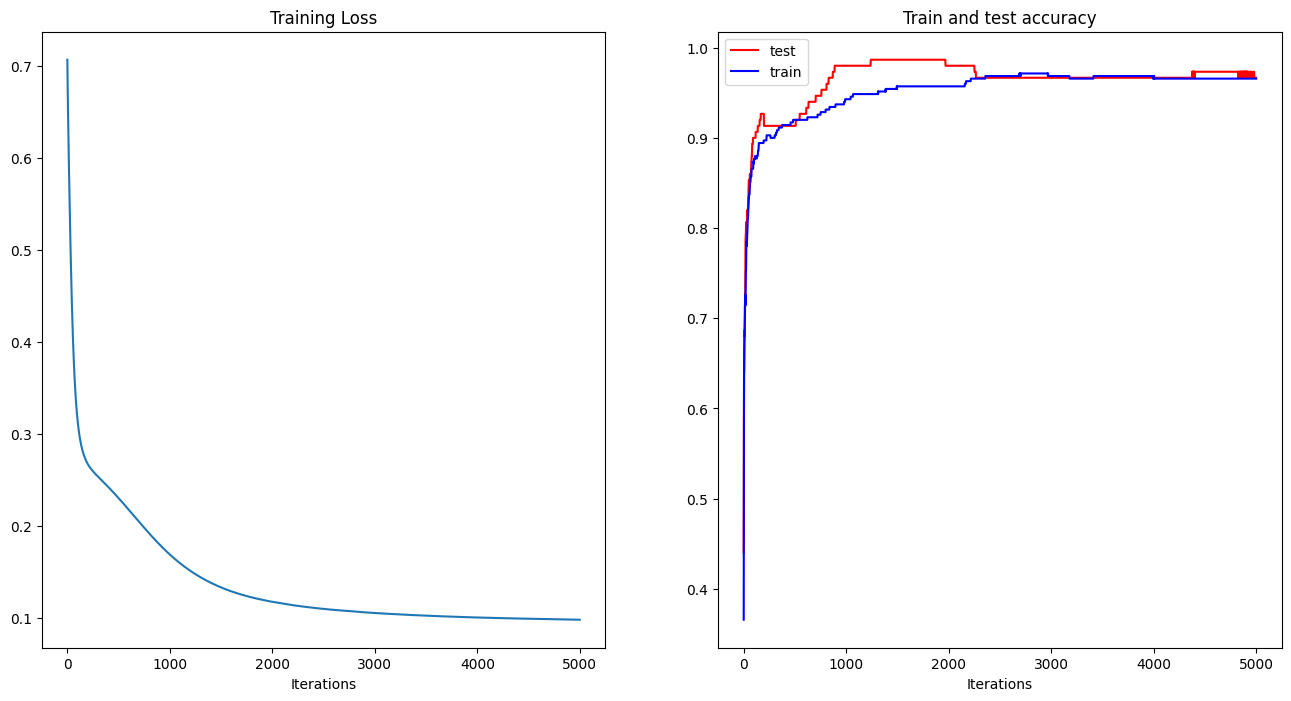

In [8]:
model.to(device) #if you have CUDA, this will make computation faster

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1) #actually SGD is just GD in this case

#init performance measures
losses = []
tr_acc = []
test_acc = []

for epoch in range(5000):
    output=model.forward(X_train)
    loss = loss_function(output, Y_train)
    optimizer.zero_grad() #required since pytorch accumulates the gradients
    loss.backward() #backpropagation step
    optimizer.step() #update the parameters
    
    #update loss and accuracy
    losses.append(loss.data)
    output_te=model(X_test)
    tr_acc.append(accuracy_score(Y_train.cpu(), torch.max(output.cpu(), 1)[1]))
    test_acc.append(accuracy_score(Y_test.cpu(), torch.max(output_te.cpu(), 1)[1]))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.plot([loss.cpu() for loss in losses])
ax1.set_title("Training Loss")
ax1.set_xlabel("Iterations")
ax2.plot(test_acc, c='r', label='test')
ax2.plot(tr_acc, c='b', label='train')
ax2.set_title("Train and test accuracy")
ax2.set_xlabel("Iterations")
plt.legend()
plt.show()

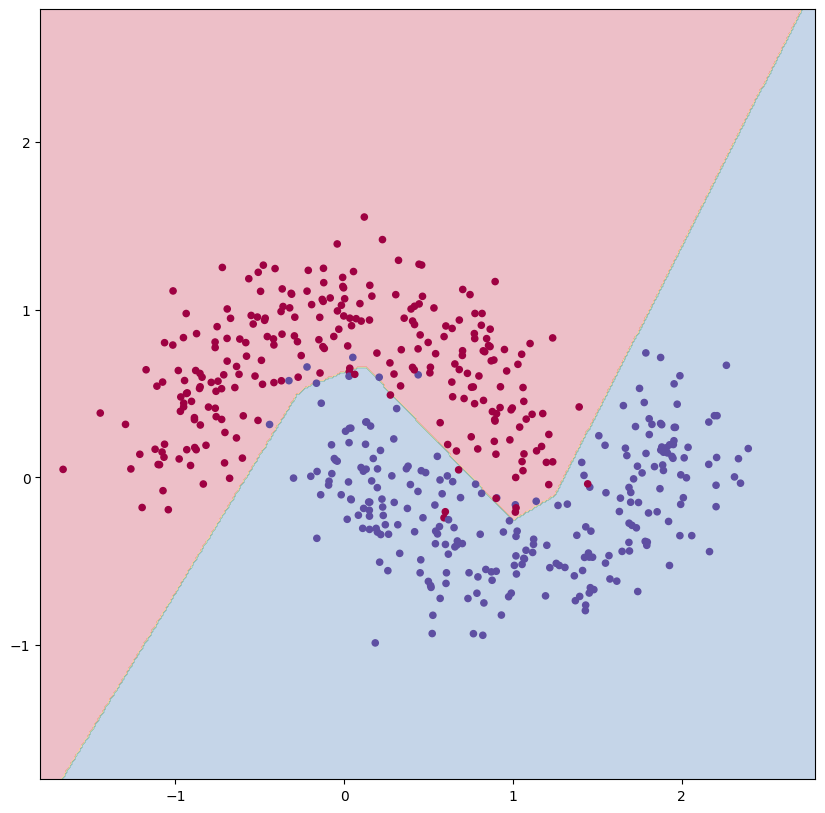

In [9]:
plot_model(torch.from_numpy(X).float(), torch.from_numpy(Y).long(), model)

> **Task 2.** (a) Run the experiment again, modifying the number of units (try 8 and 32), and compare with the results seen in Lab 6. (b) modify the activation function as tanh. (c) Modify the learning rate to 0.01 and observe the results with different number of units.

In [11]:
n_hunits_2 = 8

model_2 = nn.Sequential(
    nn.Linear(in_features=2, out_features=n_hunits),
    nn.ReLU(),
    nn.Linear(in_features=n_hunits, out_features=2)
)

n_hunits_3 = 32

model_3 = nn.Sequential(
    nn.Linear(in_features=2, out_features=n_hunits),
    nn.ReLU(),
    nn.Linear(in_features=n_hunits, out_features=2)
)

n_hunits_4 = 32

model_4 = nn.Sequential(
    nn.Linear(in_features=2, out_features=n_hunits),
    nn.Tanh(),
    nn.Linear(in_features=n_hunits, out_features=2)
)


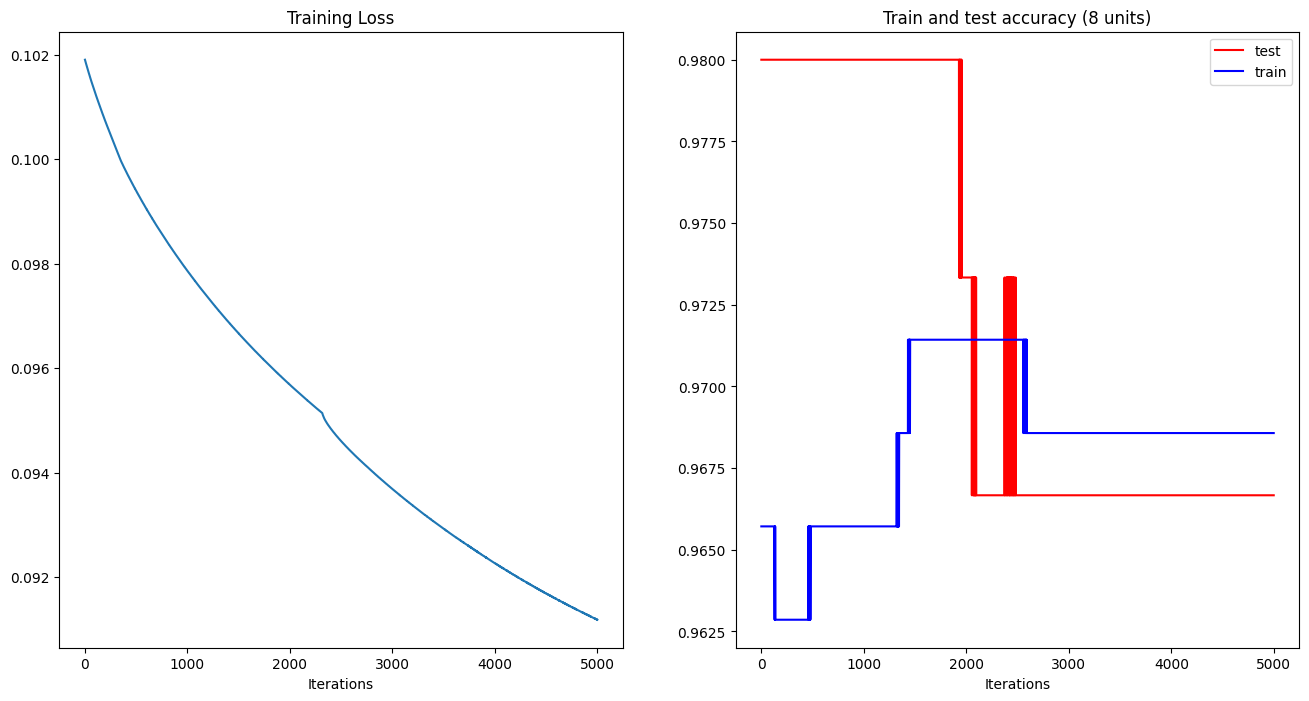

In [ ]:
model_2.to(device) #if you have CUDA, this will make computation faster

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1) #actually SGD is just GD in this case

#init performance measures
losses = []
tr_acc = []
test_acc = []

for epoch in range(5000):
    output=model_2.forward(X_train)
    loss = loss_function(output, Y_train)
    optimizer.zero_grad() #required since pytorch accumulates the gradients
    loss.backward() #backpropagation step
    optimizer.step() #update the parameters
    
    #update loss and accuracy
    losses.append(loss.data)
    output_te=model_2(X_test)
    tr_acc.append(accuracy_score(Y_train.cpu(), torch.max(output.cpu(), 1)[1]))
    test_acc.append(accuracy_score(Y_test.cpu(), torch.max(output_te.cpu(), 1)[1]))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.plot([loss.cpu() for loss in losses])
ax1.set_title("Training Loss (8 units)")
ax1.set_xlabel("Iterations")
ax2.plot(test_acc, c='r', label='test')
ax2.plot(tr_acc, c='b', label='train')
ax2.set_title("Train and test accuracy (8 units)")
ax2.set_xlabel("Iterations")
plt.legend()
plt.show()

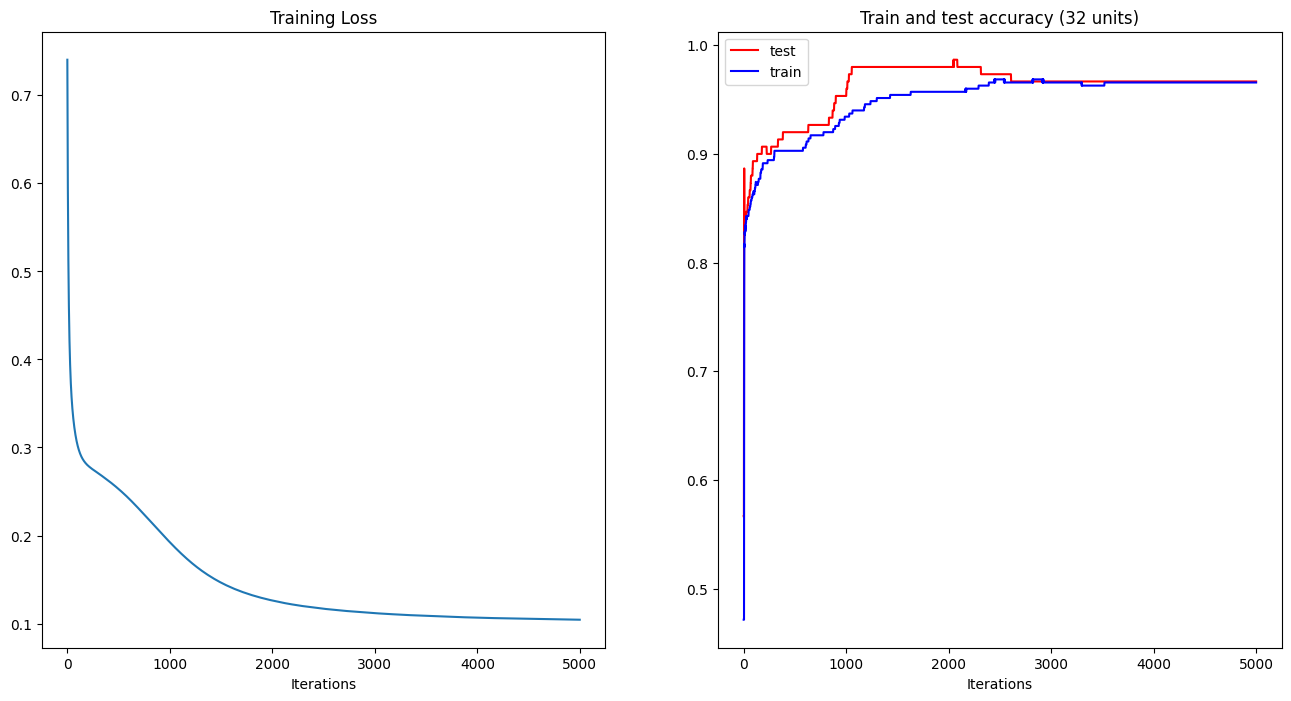

In [ ]:
model_3.to(device) #if you have CUDA, this will make computation faster

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1) #actually SGD is just GD in this case

#init performance measures
losses = []
tr_acc = []
test_acc = []

for epoch in range(5000):
    output=model_3.forward(X_train)
    loss = loss_function(output, Y_train)
    optimizer.zero_grad() #required since pytorch accumulates the gradients
    loss.backward() #backpropagation step
    optimizer.step() #update the parameters
    
    #update loss and accuracy
    losses.append(loss.data)
    output_te=model_3(X_test)
    tr_acc.append(accuracy_score(Y_train.cpu(), torch.max(output.cpu(), 1)[1]))
    test_acc.append(accuracy_score(Y_test.cpu(), torch.max(output_te.cpu(), 1)[1]))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.plot([loss.cpu() for loss in losses])
ax1.set_title("Training Loss (32 units)")
ax1.set_xlabel("Iterations")
ax2.plot(test_acc, c='r', label='test')
ax2.plot(tr_acc, c='b', label='train')
ax2.set_title("Train and test accuracy (32 units)")
ax2.set_xlabel("Iterations")
plt.legend()
plt.show()

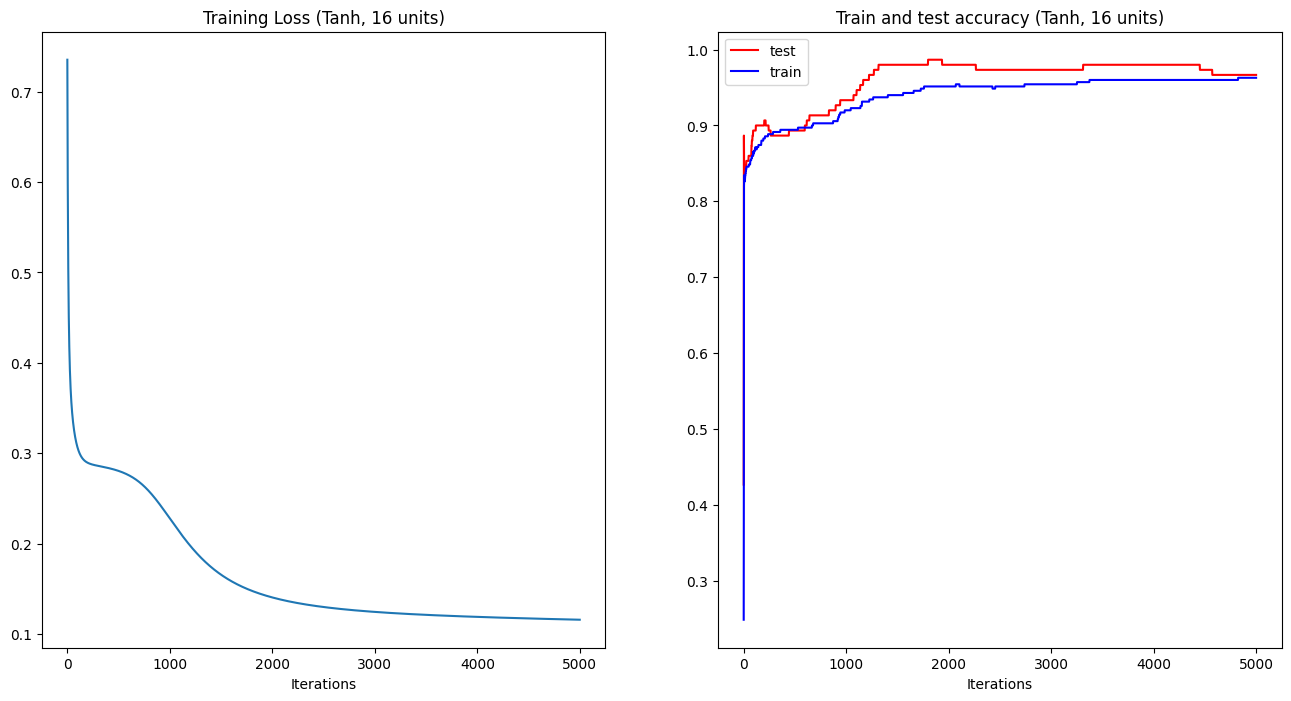

In [15]:
model_4.to(device) #if you have CUDA, this will make computation faster

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1) #actually SGD is just GD in this case

#init performance measures
losses = []
tr_acc = []
test_acc = []

for epoch in range(5000):
    output=model_4.forward(X_train)
    loss = loss_function(output, Y_train)
    optimizer.zero_grad() #required since pytorch accumulates the gradients
    loss.backward() #backpropagation step
    optimizer.step() #update the parameters
    
    #update loss and accuracy
    losses.append(loss.data)
    output_te=model_4(X_test)
    tr_acc.append(accuracy_score(Y_train.cpu(), torch.max(output.cpu(), 1)[1]))
    test_acc.append(accuracy_score(Y_test.cpu(), torch.max(output_te.cpu(), 1)[1]))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.plot([loss.cpu() for loss in losses])
ax1.set_title("Training Loss (Tanh, 16 units)")
ax1.set_xlabel("Iterations")
ax2.plot(test_acc, c='r', label='test')
ax2.plot(tr_acc, c='b', label='train')
ax2.set_title("Train and test accuracy (Tanh, 16 units)")
ax2.set_xlabel("Iterations")
plt.legend()
plt.show()

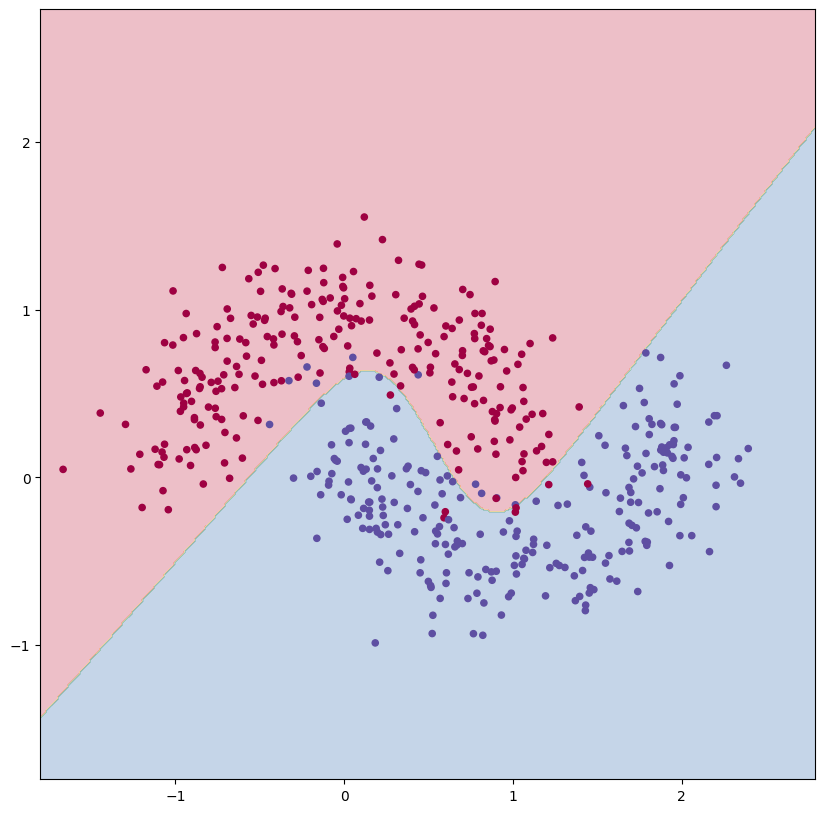

In [16]:
plot_model(torch.from_numpy(X).float(), torch.from_numpy(Y).long(), model_4)

## Classifying Images

For the next tasks we will load the MNIST dataset:

In [17]:
input_size  = 28*28   # images are 28x28 pixels
output_size = 10      # there are 10 classes

transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])

dataset_tr = datasets.MNIST('./data', train=True, download=True, transform=transform) #Change download to False once you download the dataset the first time
dataset_te = datasets.MNIST('./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset_tr,batch_size=64,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset_te, batch_size=1000,shuffle=True)

#load training data
images, labels = next(iter(train_loader))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:06<00:00, 1547683.56it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 365983.24it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1403701.23it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2276048.84it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



Let's take a look at the data:

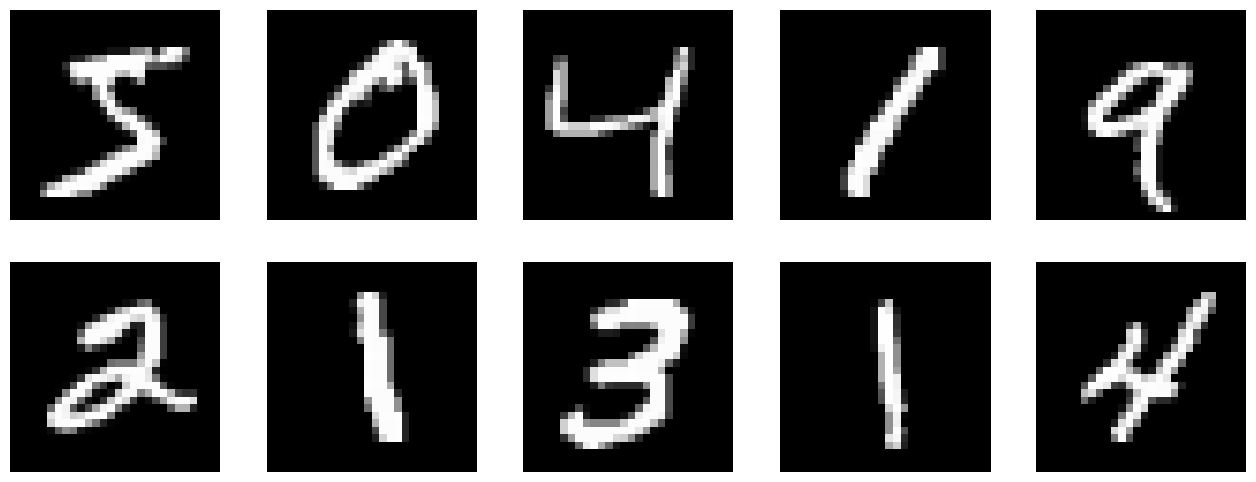

In [18]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    image, _ = train_loader.dataset.__getitem__(i)
    plt.imshow(image.squeeze().numpy(), cmap='gray')
    plt.axis('off');

> **Task 3**: implement a fully connected NN with 2 relu activation layers. Note that the image size is 28x28 but you will need to reshape it as a vector of 784 elements.
For the output layer, we will use log_softmax and for the loss, we will use the negative log-likelihood loss (nll_loss), both for numerical stability


In [43]:
import torch.nn.functional as F

class FCNN(nn.Module):
    def __init__(self, input_size, n_hidden, output_size):
        super(FCNN, self).__init__()
        self.input_size = input_size
        self.linear1 = nn.Linear(in_features=input_size, out_features=n_hidden)
        self.linear2 = nn.Linear(in_features=n_hidden, out_features=n_hidden)
        self.linear3 = nn.Linear(in_features=n_hidden, out_features=output_size)

    def forward(self, x):
        x = x.view(-1, self.input_size) # [64, 1, 28, 28] -> [64, 28*28] 
        # where batch_size = 64, channel_size = 1 (black/white images)
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)
        output = F.log_softmax(x, dim = 1)
        return output

In [44]:

def train(model, device, train_loader, optimizer, epoch):
    log_interval=100
    model.train() #set model in train mode
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
    
        loss = F.nll_loss(input=output, target=target)
        
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(model, device, test_loader):
    model.eval() #set model in test mode
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

Let's take a look at the loss and accuracy of our FCNN:

In [45]:
n_hidden = 8 # number of hidden units

model_fnn = FCNN(input_size, n_hidden, output_size)
model_fnn.to(device)
optimizer = torch.optim.SGD(model_fnn.parameters(), lr=0.01, momentum=0.5)

for epoch in range(0, 1):
    train(model_fnn, device, train_loader, optimizer, epoch)
    test(model_fnn, device, test_loader)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.393126
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.045263
Train Epoch: 0 [12800/60000 (21%)]	Loss: 1.737148
Train Epoch: 0 [19200/60000 (32%)]	Loss: 1.449324
Train Epoch: 0 [25600/60000 (43%)]	Loss: 1.194362
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.710365
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.732641
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.596477
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.637818
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.559040

Test set: Average loss: 0.5066, Accuracy: 8490/10000 (85%)



Let's see visualize how different units react to the input; in particular, the following code is useful to show the activations of each unit with respect to the input class. We are going to look in particular into the output of layer 3.

A note about how LayerActivations works: it is based on pytorch *hooks*. Hooks are used for inspecting / modifying the output and the gradients of a layer. Hooks can be registered on a Module or a Tensor.The hook can be a forward hook or a backward hook. The forward hook will be executed when a forward call is executed. The backward hook will be executed in the backward phase. In our case we use a forward hook to visualize the output of a layer.

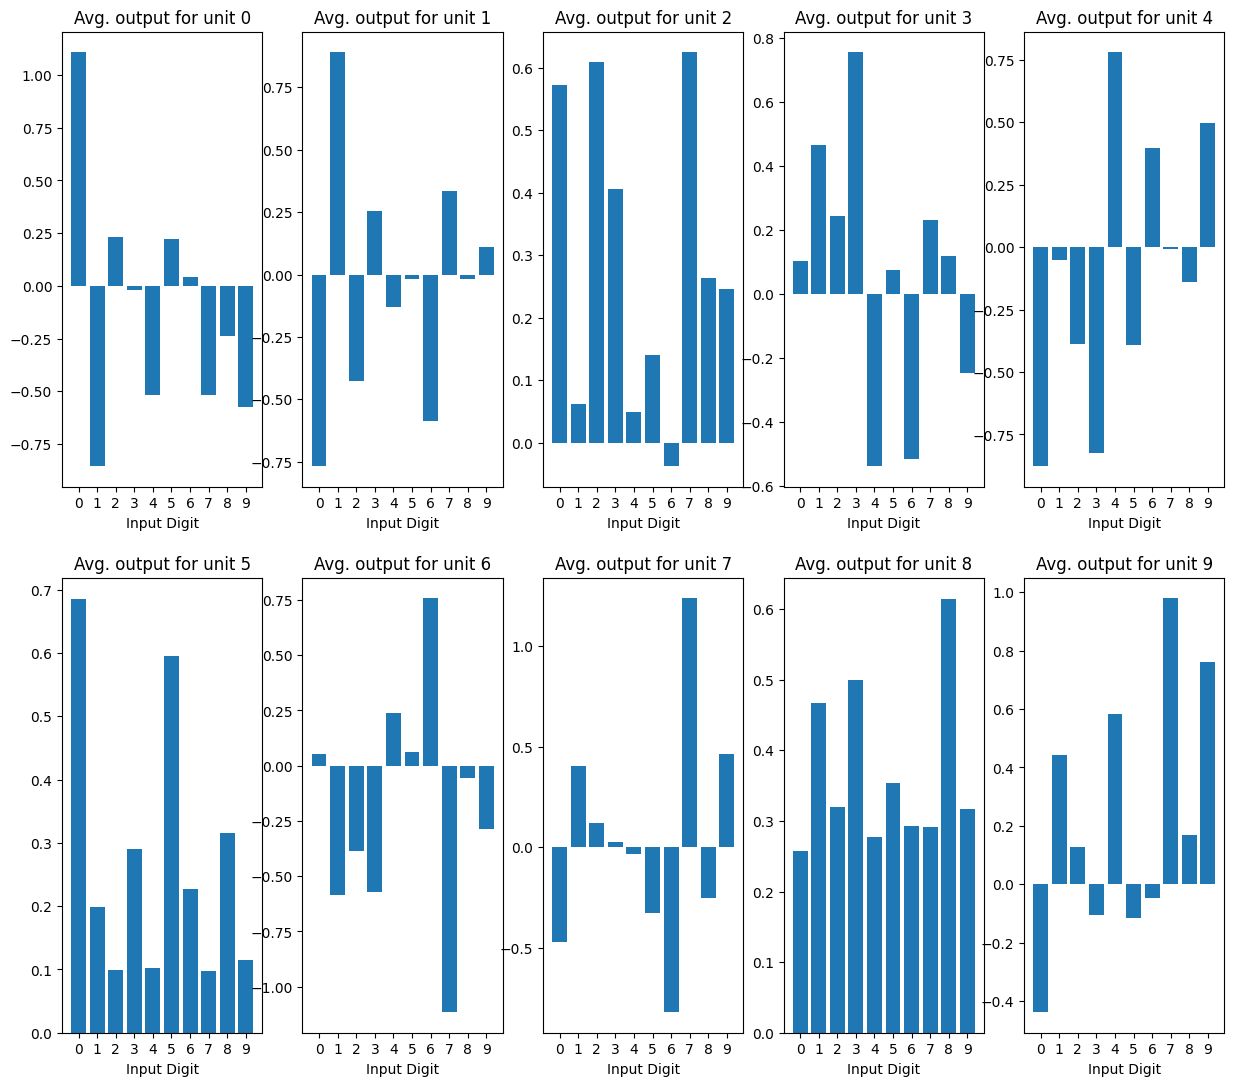

In [46]:
class LayerActivations():
    #to look into the layers and register the activation values
    features=None #the activation values
    
    def __init__ (self, model_layer):
        #model_layer: the layer to be monitored
        self.hook = model_layer.register_forward_hook(self.hook_fn)
    
    def hook_fn(self,module,input,output):
        self.features = output.cpu()
        
    def remove(self): #call this once you've read the values
        self.hook.remove()

def getActivations(model, model_layer, images):
    """Input:
      model: (nn.Module) the model from which we need to visualize layers
      model_layer: (nn.Module) the layer to be visualized
      images: tensor of size [n_images, channel, img_x, img_y]
    Output:
      activations
    """
    conv_out = LayerActivations(model_layer)
    o = model(images)
    act = conv_out.features
    conv_out.remove()
    return act

for images, targets in test_loader:
    n_units=10
    act=getActivations(model_fnn, model_fnn.linear3, images.to(device))
    
    M=torch.zeros([n_units, 10, 1000], dtype=torch.float32)
    for u in range(n_units):
        for i in range(1000):
            M[u][targets[i].data][i]=act[i][u].item()
    
    A=torch.mean(M, dim=2)
    
    plt.figure(figsize=(15,13))
    for i in range(n_units):
        plt.subplot(2, 5, i + 1)
        plt.bar(x=np.arange(10), height=A[i].numpy())
        plt.ylim=(-1.5, 1.5)
        plt.xticks(np.arange(10))
        plt.xlabel("Input Digit")
        plt.title("Avg. output for unit "+str(i))
    
    plt.show()
    break #no need to go further, we are testing so the activations won't change
    

## Convolutional Neural Networks

Let's see if we can do better: with images, convolutional layers are more efficient than Dense layers since they can capture local information in the images. See also <a href="https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks">this page</a> for a more complete overview of CNNs.

>**Task 4:** implement a CNN with 2 <a href="https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html">convolutional layers</a> each followed by a <a href="https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html">max pooling</a> layer (kernel_size=2). Complete the network with 2 fully connected layers, where the final layer has 50 input units (and 10 outputs, one for each class). Kernel size for the convolutional layers will be 5.

If you use the default options for stride (1) and padding (0), the image width and height after each convolution will change as follows: $W'=W-(K-1)$, where $K$ stands for the kernel size.



In [47]:
class CNN(nn.Module):
    def __init__(self, input_size, n_feature, output_size):
        super(CNN, self).__init__()
        self.input_size = input_size
        kernel_size = 5
        self.n_feature = n_feature

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=n_feature, kernel_size=kernel_size)
        self.conv2 = nn.Conv2d(in_channels=n_feature, out_channels=n_feature, kernel_size=kernel_size)
        self.fc1 = nn.Linear(in_features=n_feature*4*4, out_features=50)
        self.fc2 = nn.Linear(in_features=50, out_features=10)
        
        
        
    def forward(self, x, verbose=False):
        #initial dimensions for x will be [64, 1, 28, 28]
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, self.n_feature*4*4)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [48]:
# Training settings 
n_features = 6 # number of feature maps

model_cnn = CNN(input_size, n_features, output_size)
model_cnn.to(device)
optimizer = torch.optim.SGD(model_cnn.parameters(), lr=0.01, momentum=0.5)

for epoch in range(0, 1):
    train(model_cnn, device, train_loader, optimizer, epoch)
    test(model_cnn, device, test_loader)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.309458
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.899785
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.303944
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.605861
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.373871
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.650693
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.397930
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.208733
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.296523
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.231039

Test set: Average loss: 0.1730, Accuracy: 9460/10000 (95%)



Let's visualize the feature maps for the two convolution layers using the `getActivations` function that we introduced above:

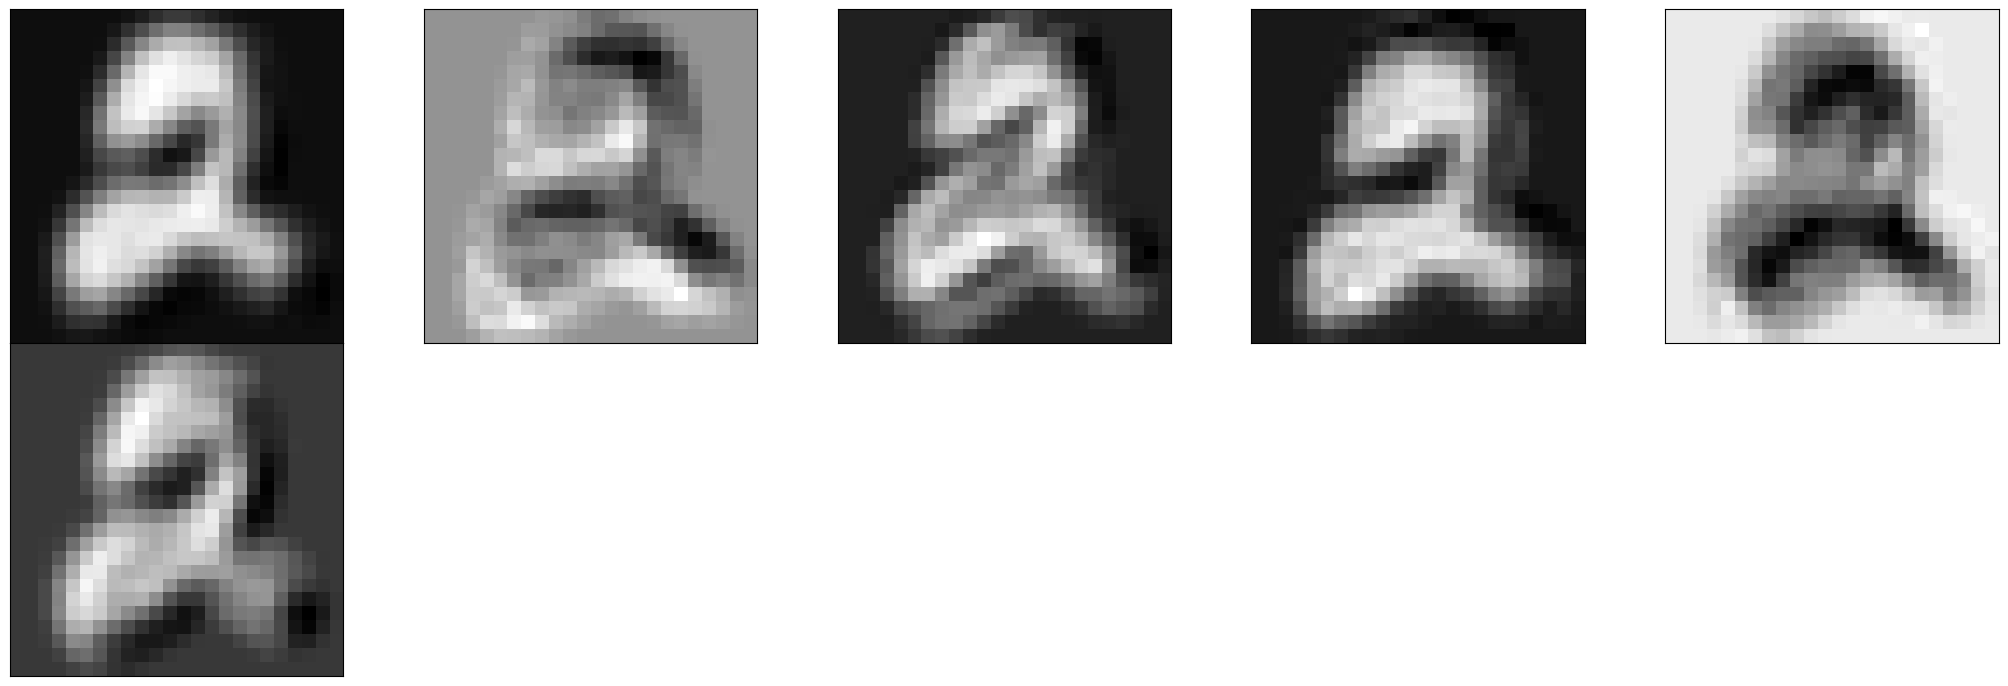

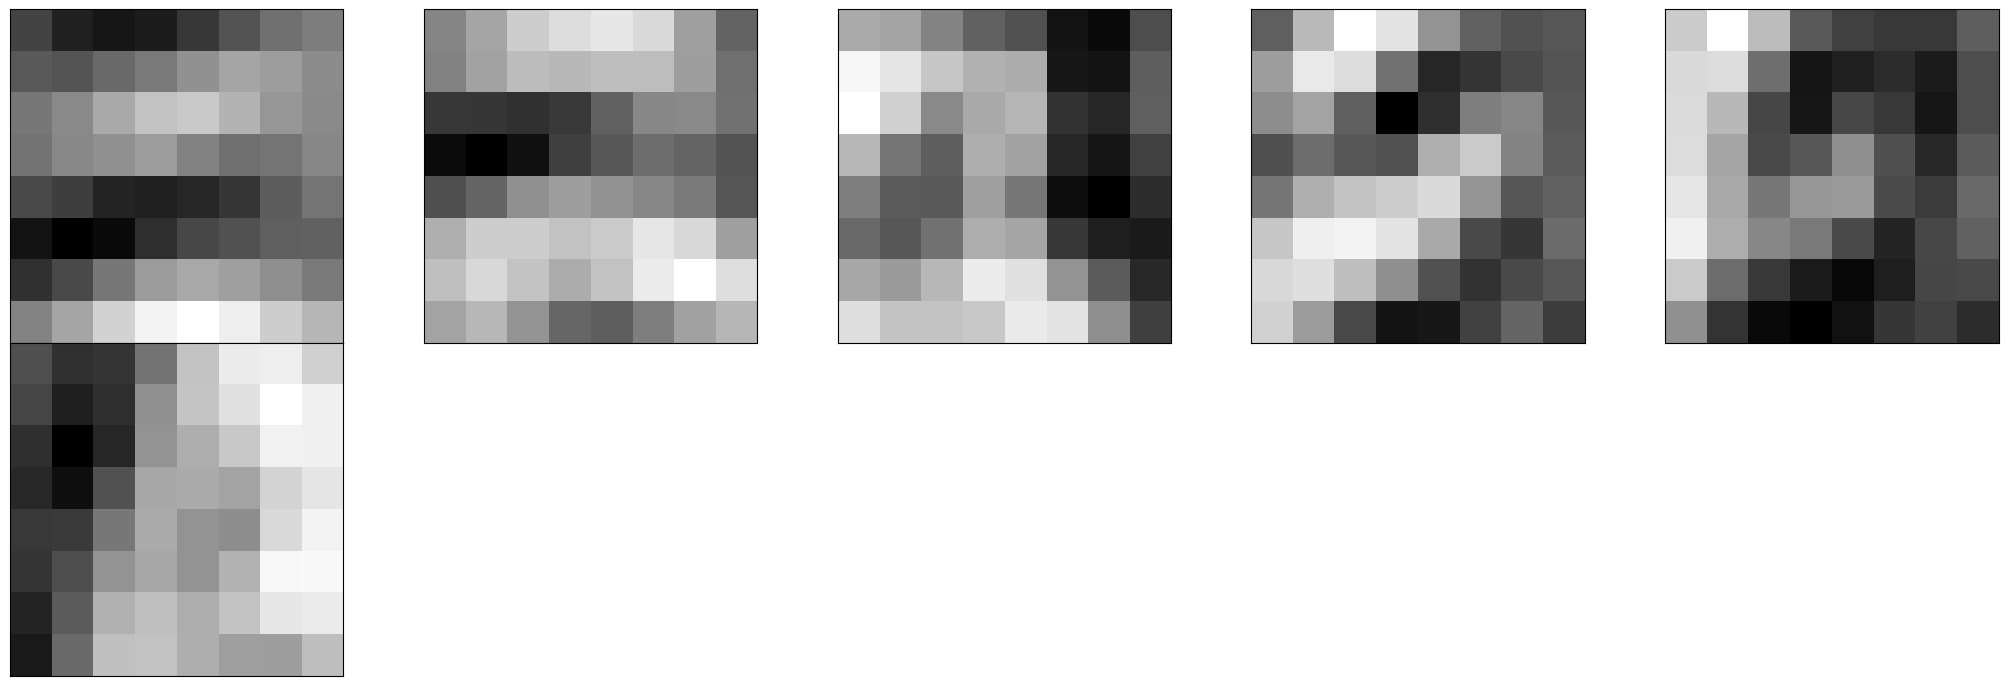

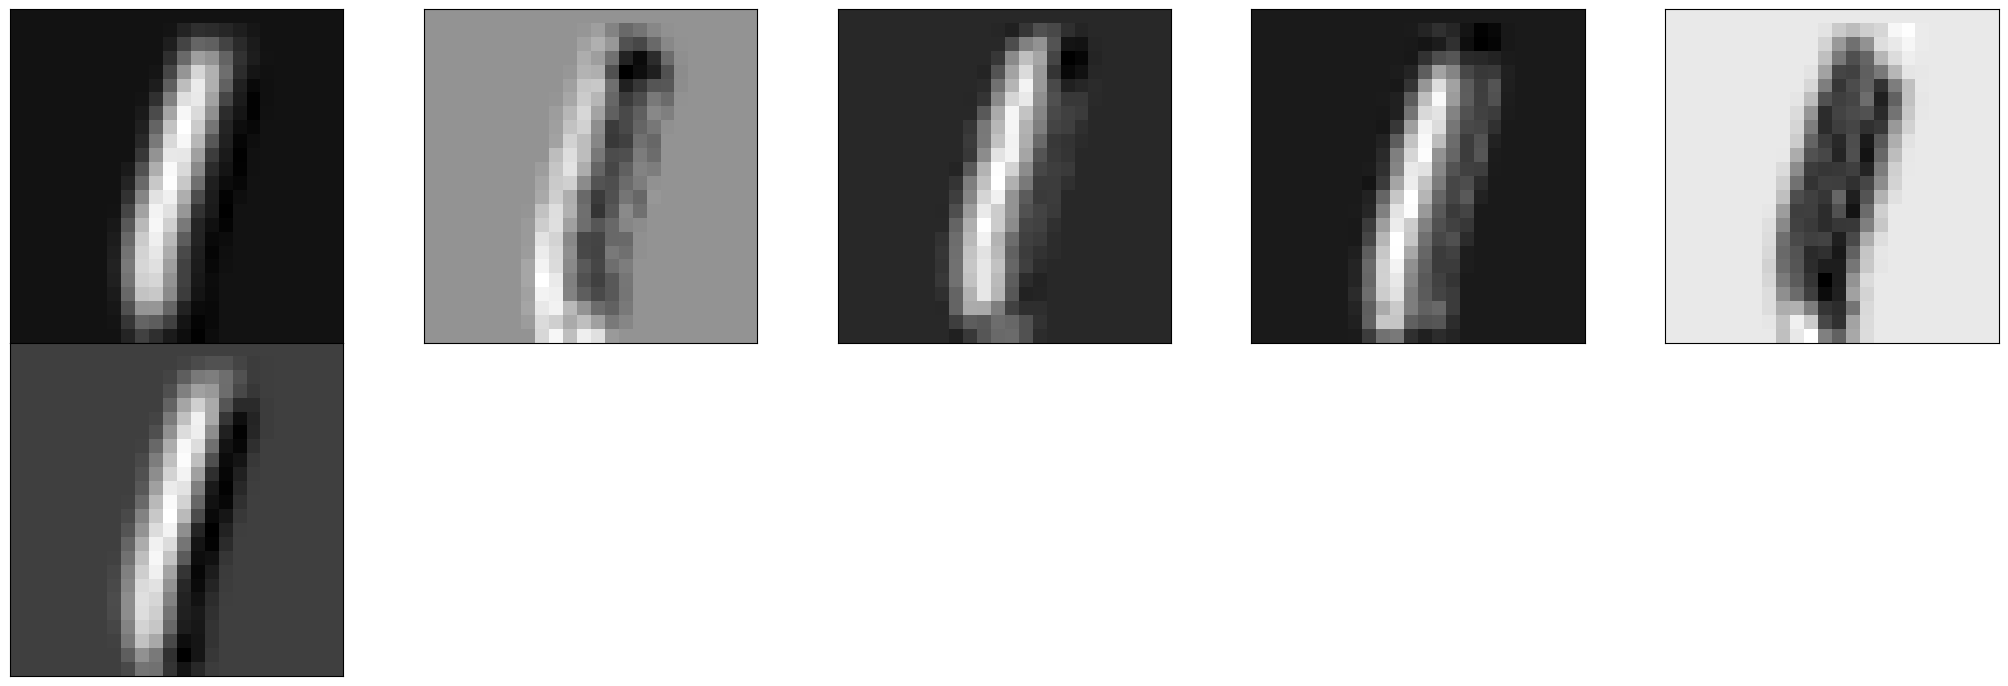

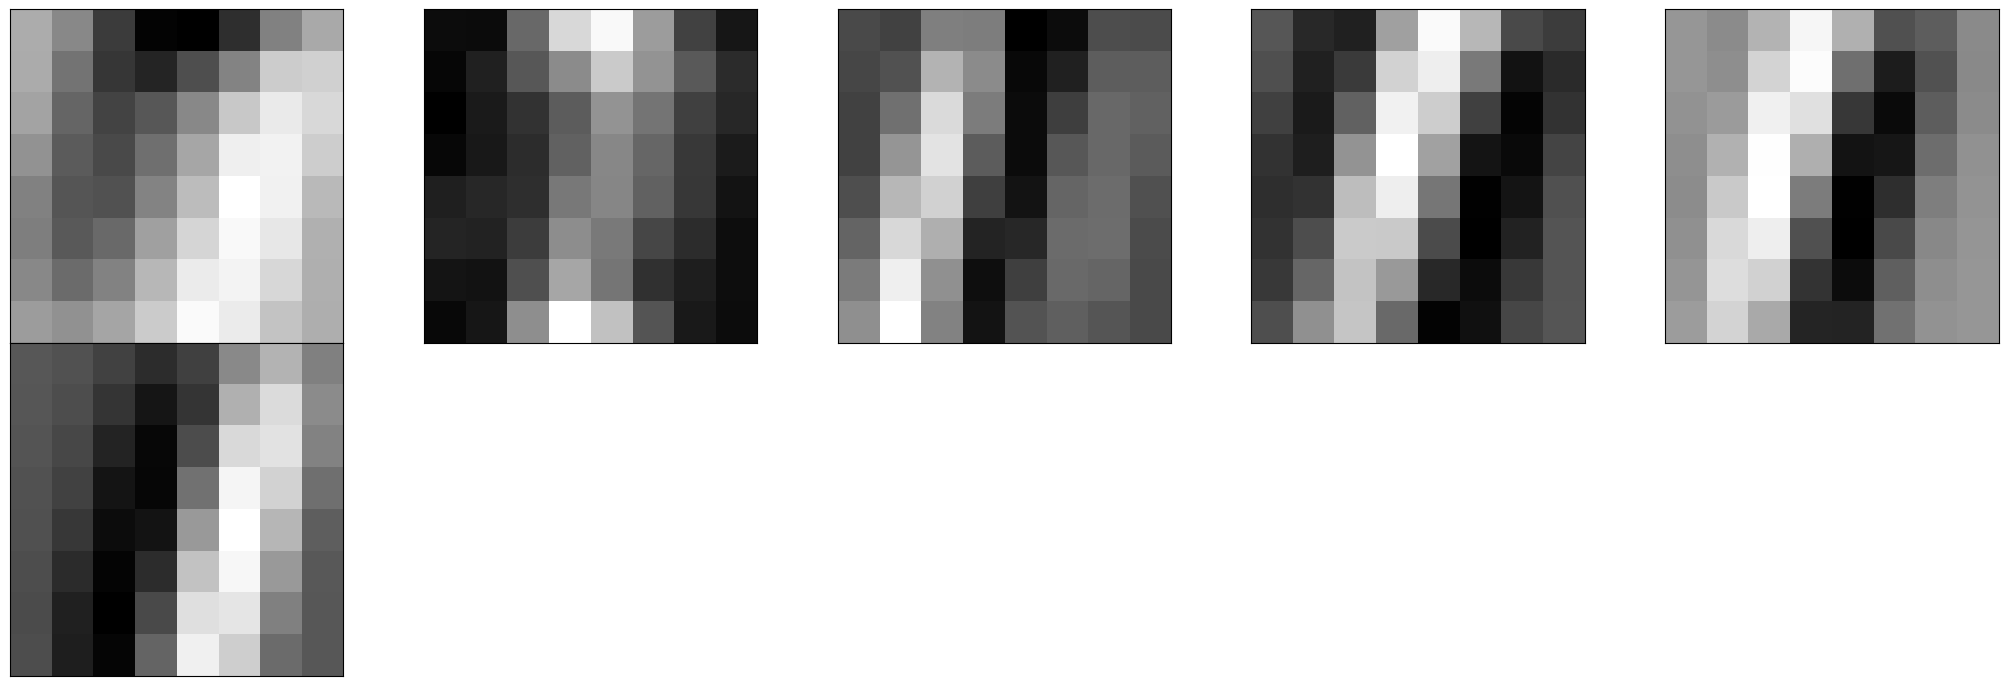

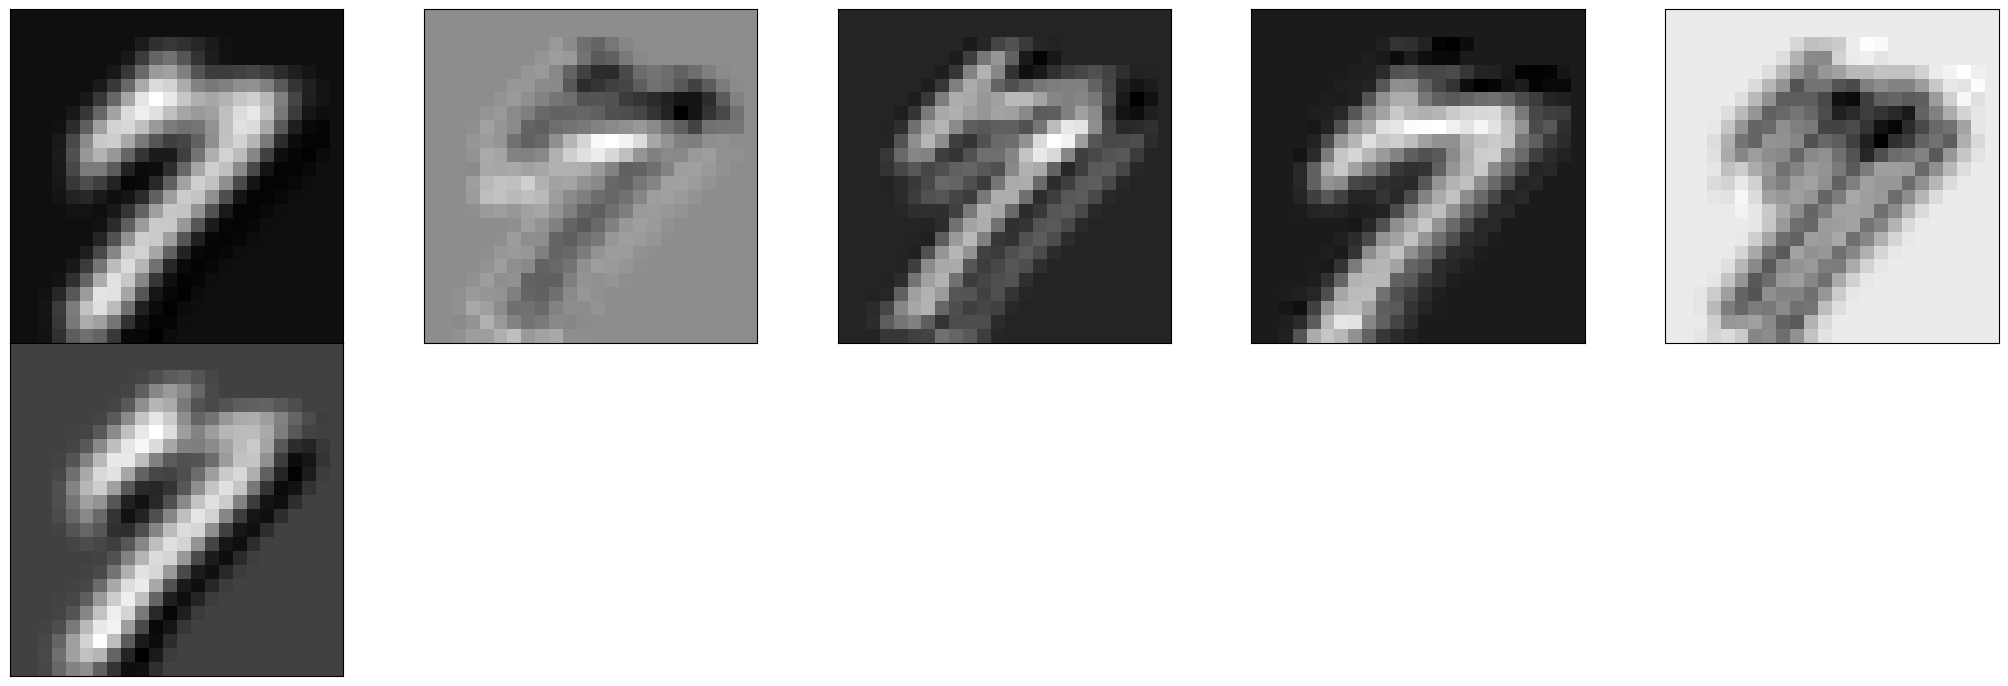

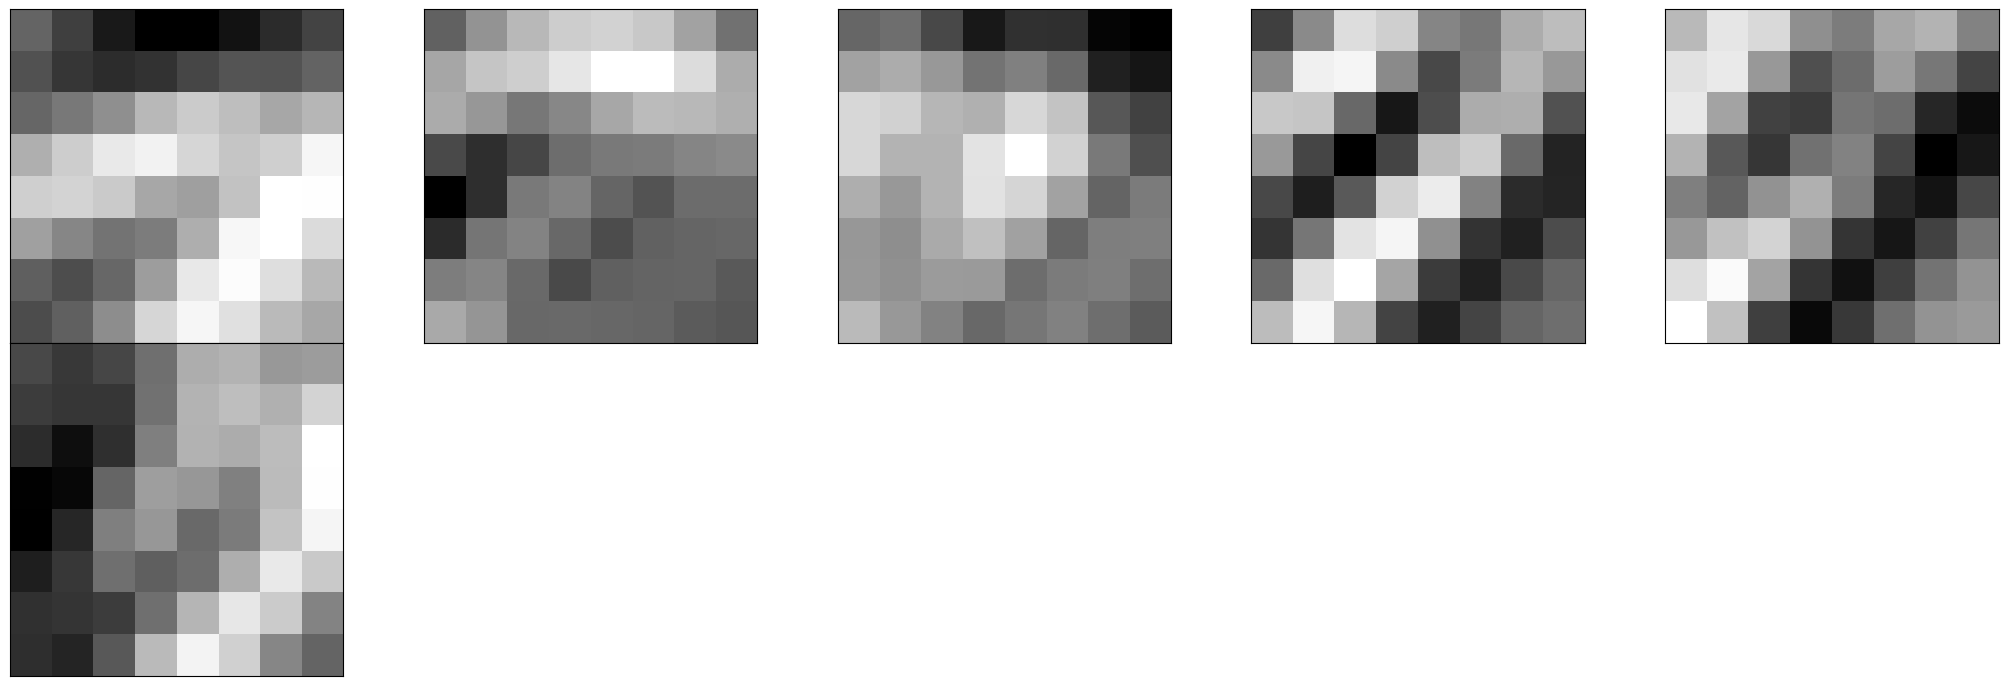

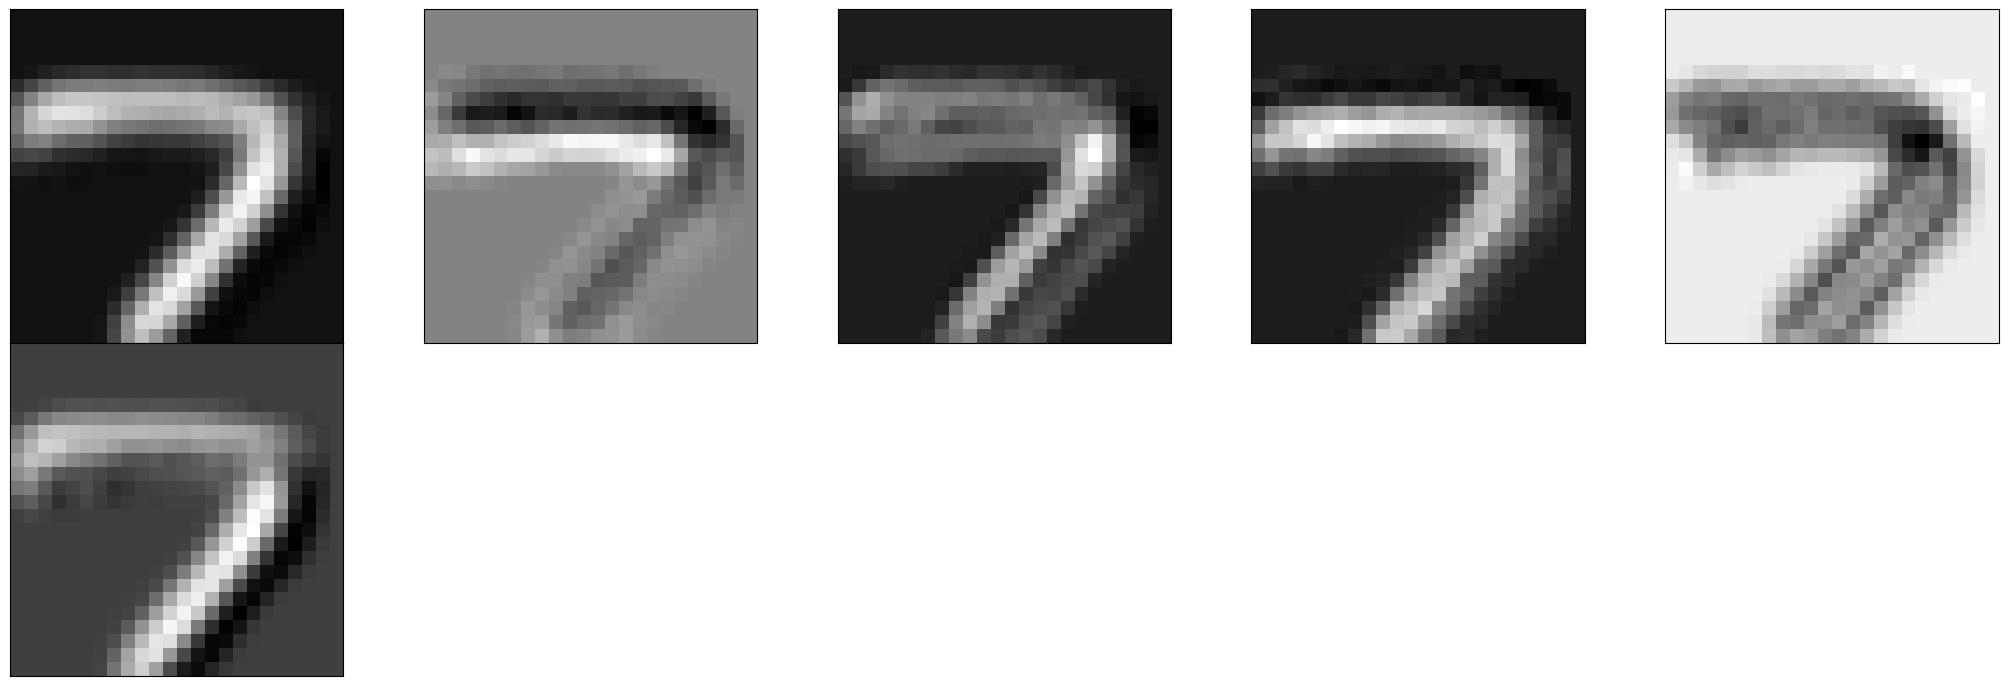

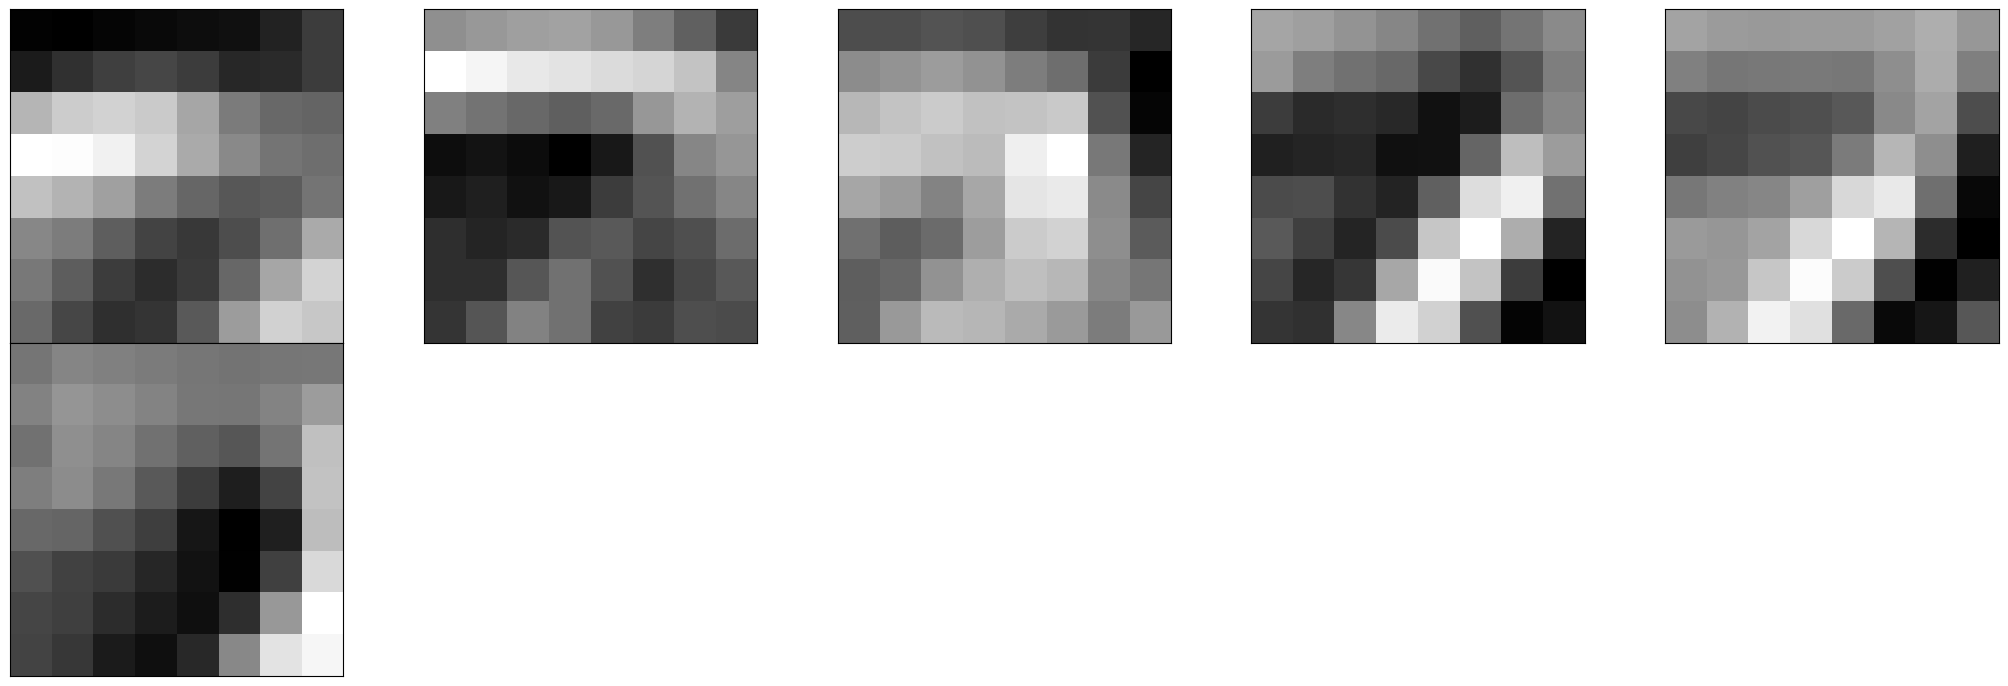

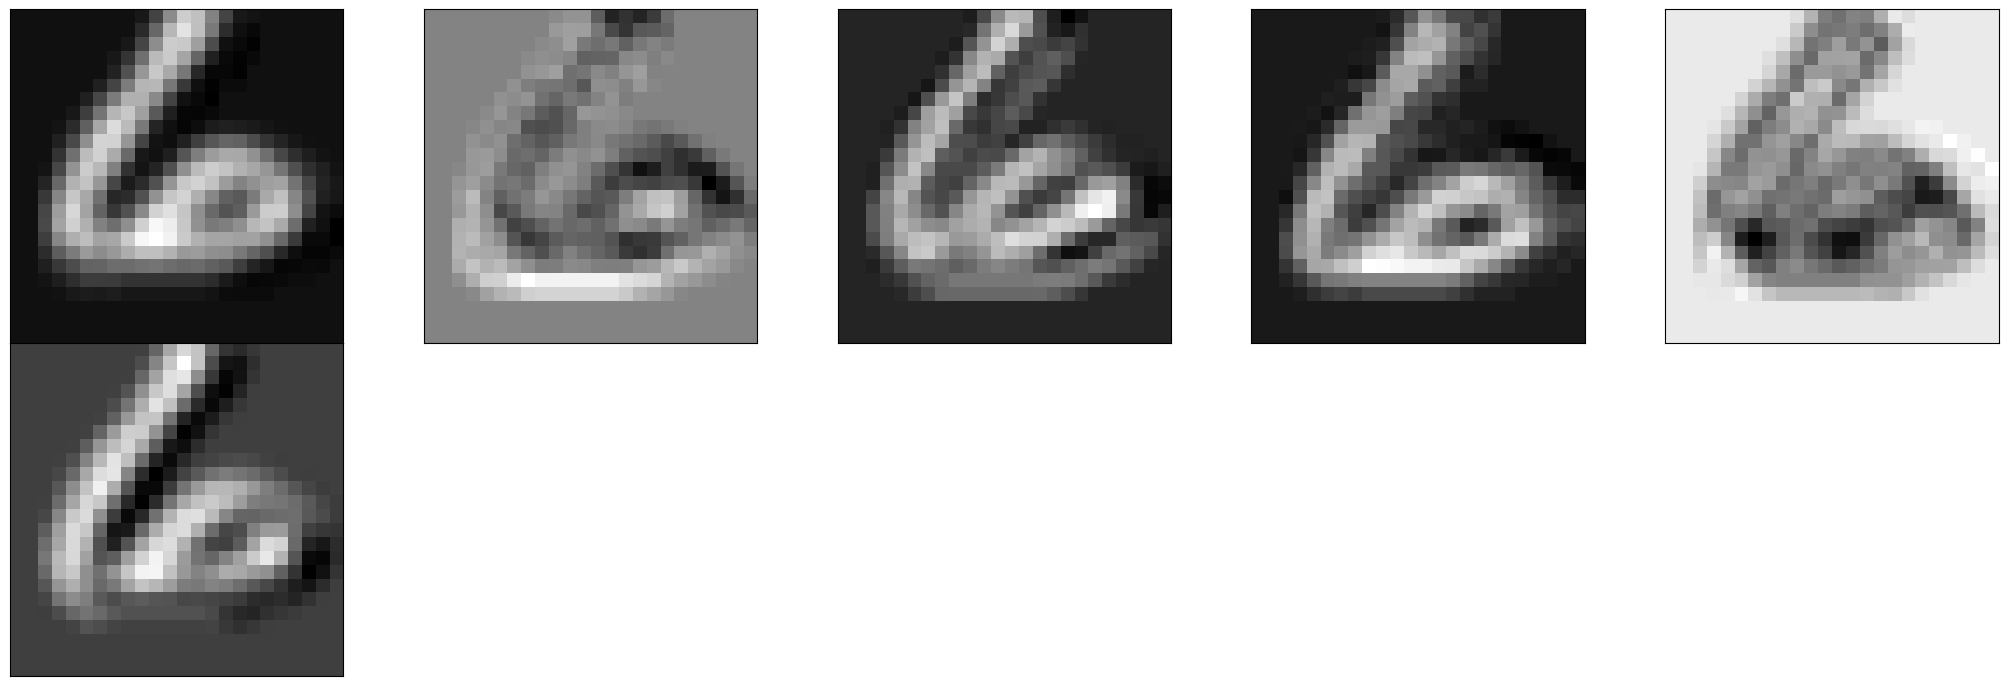

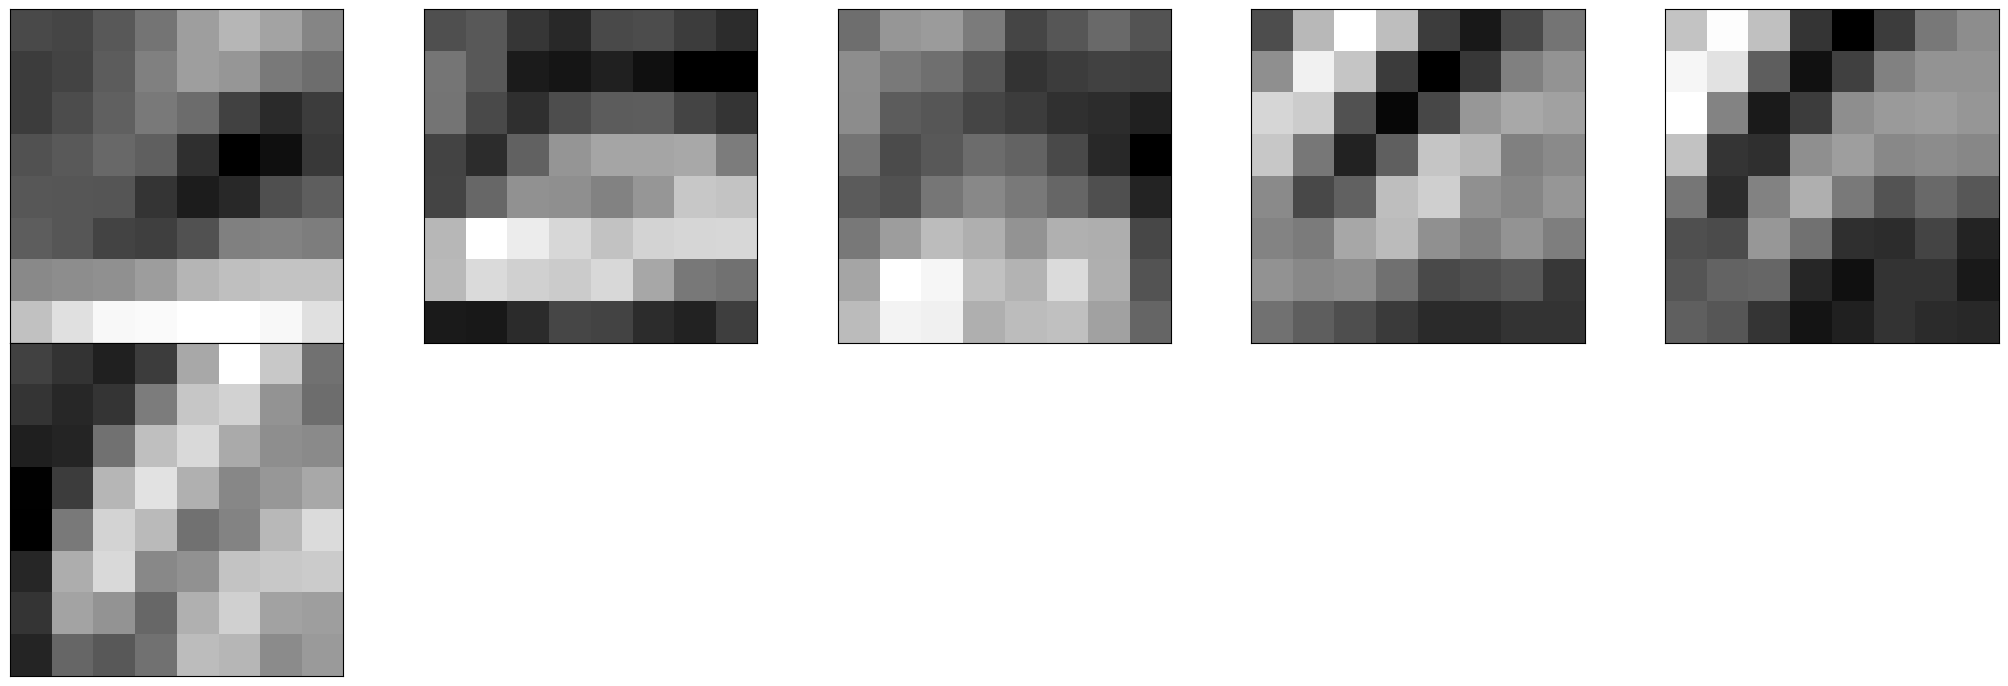

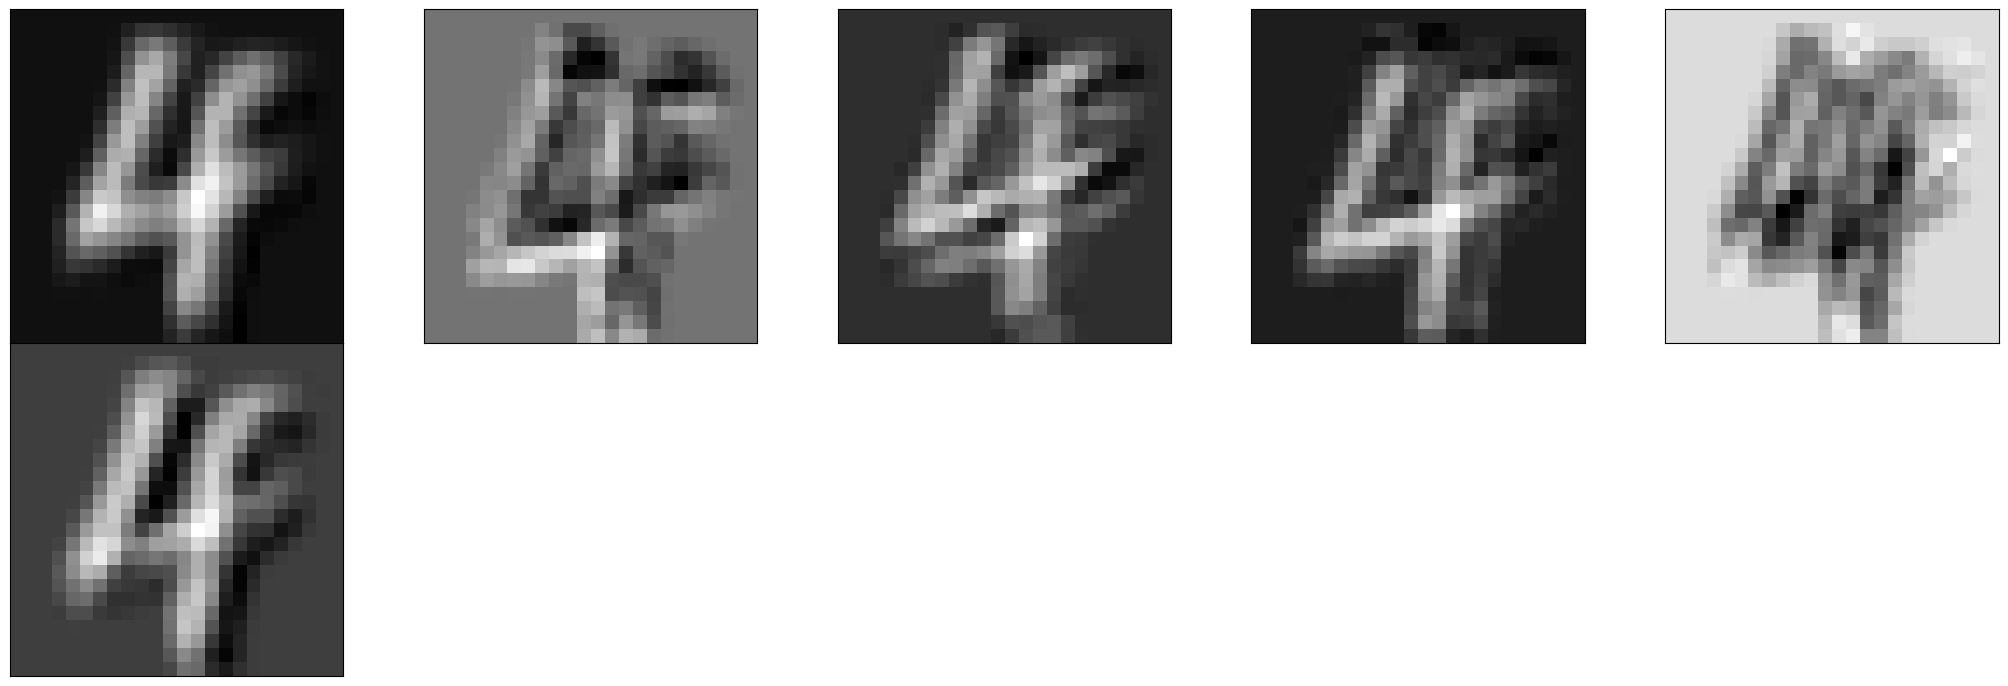

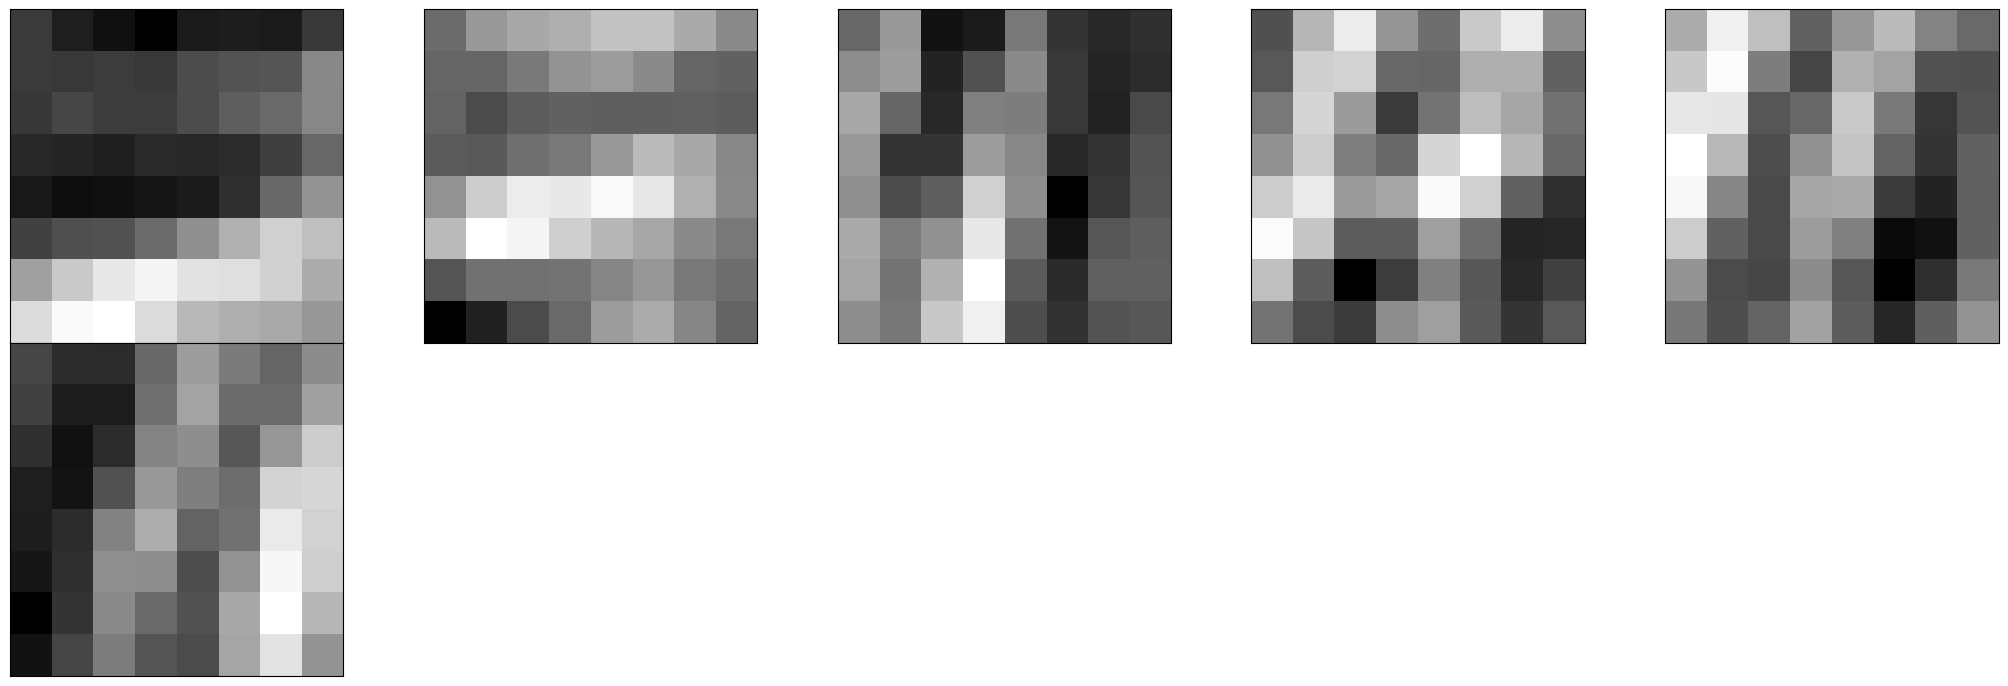

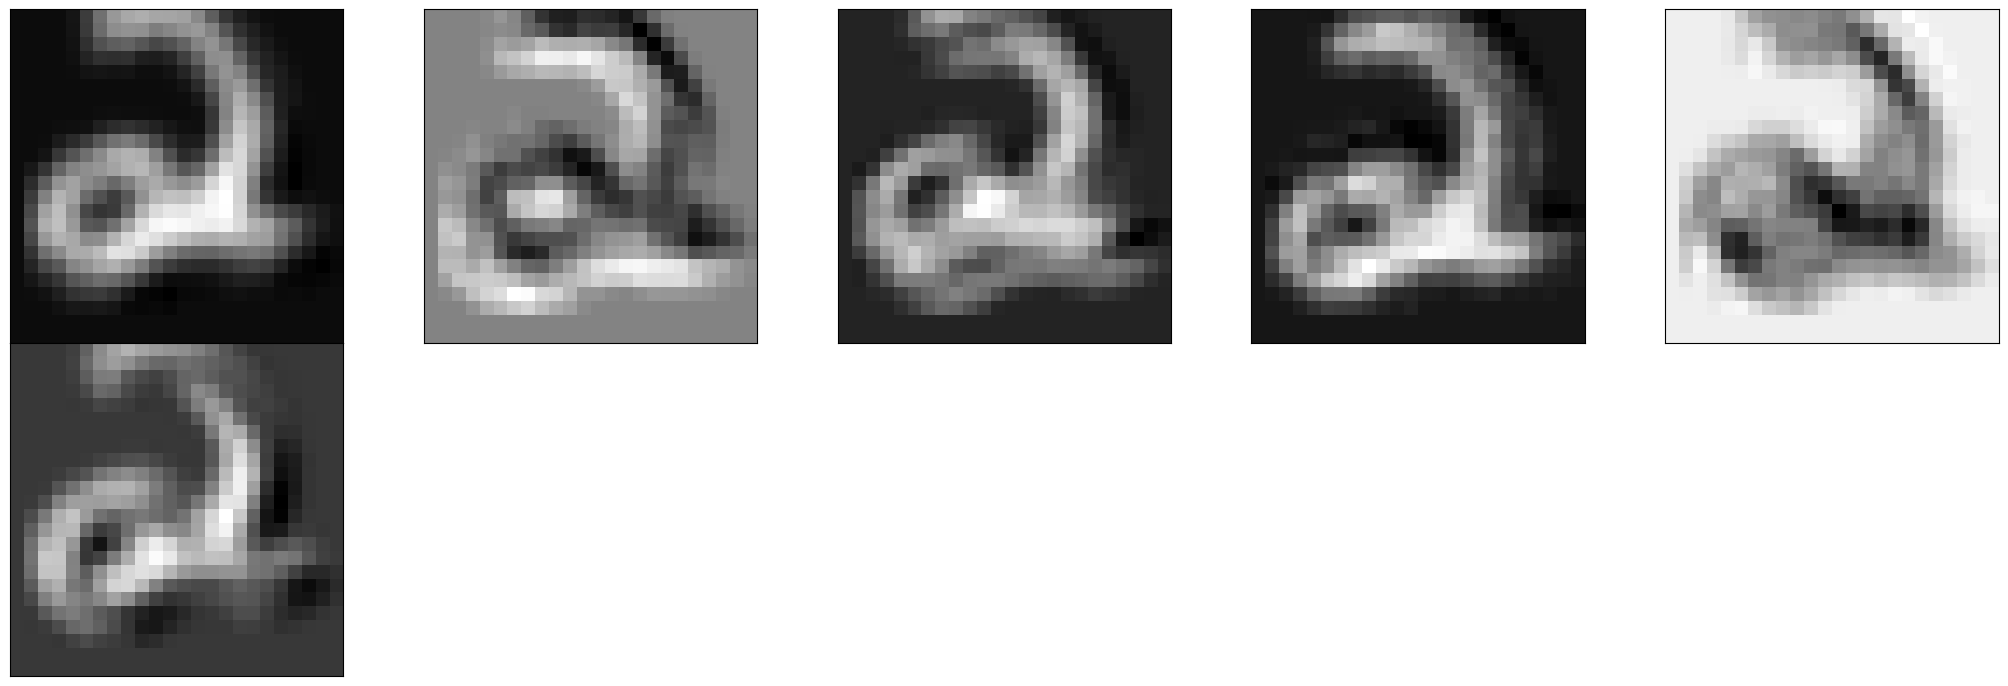

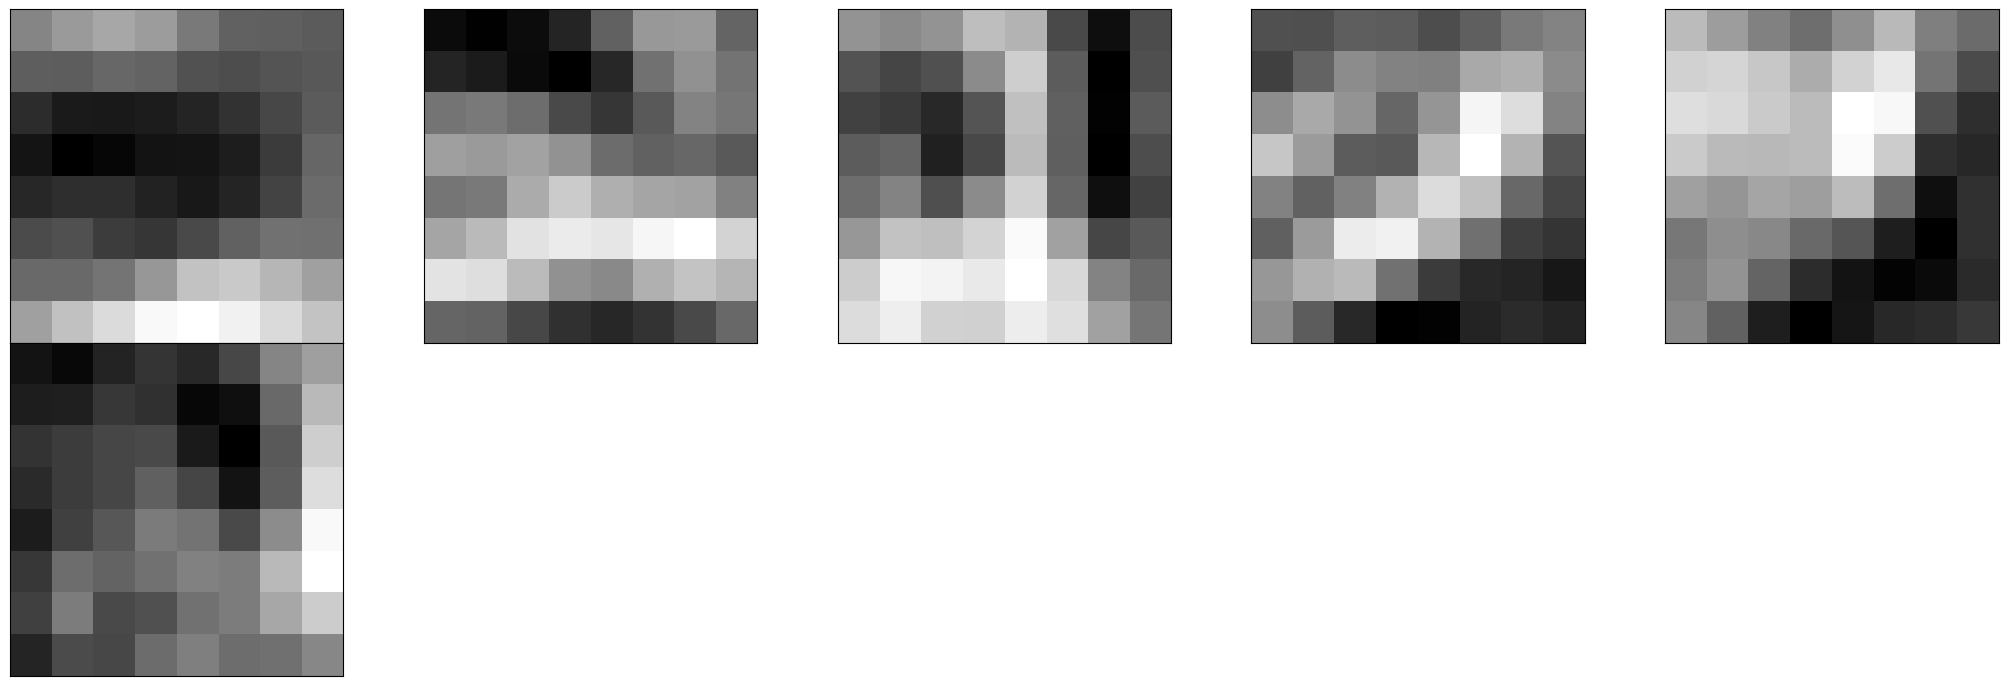

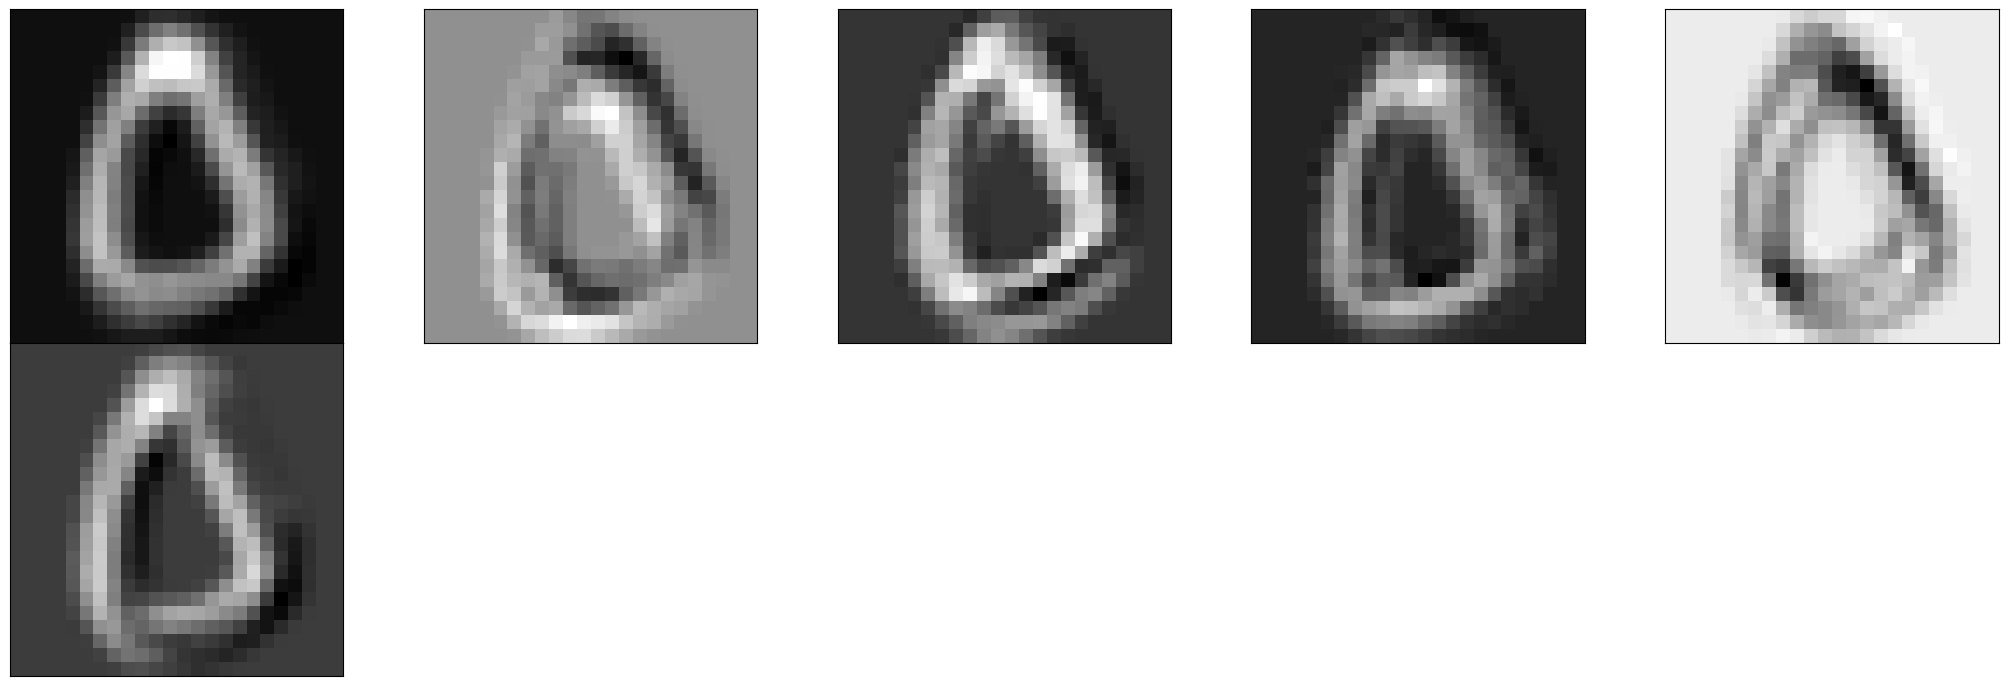

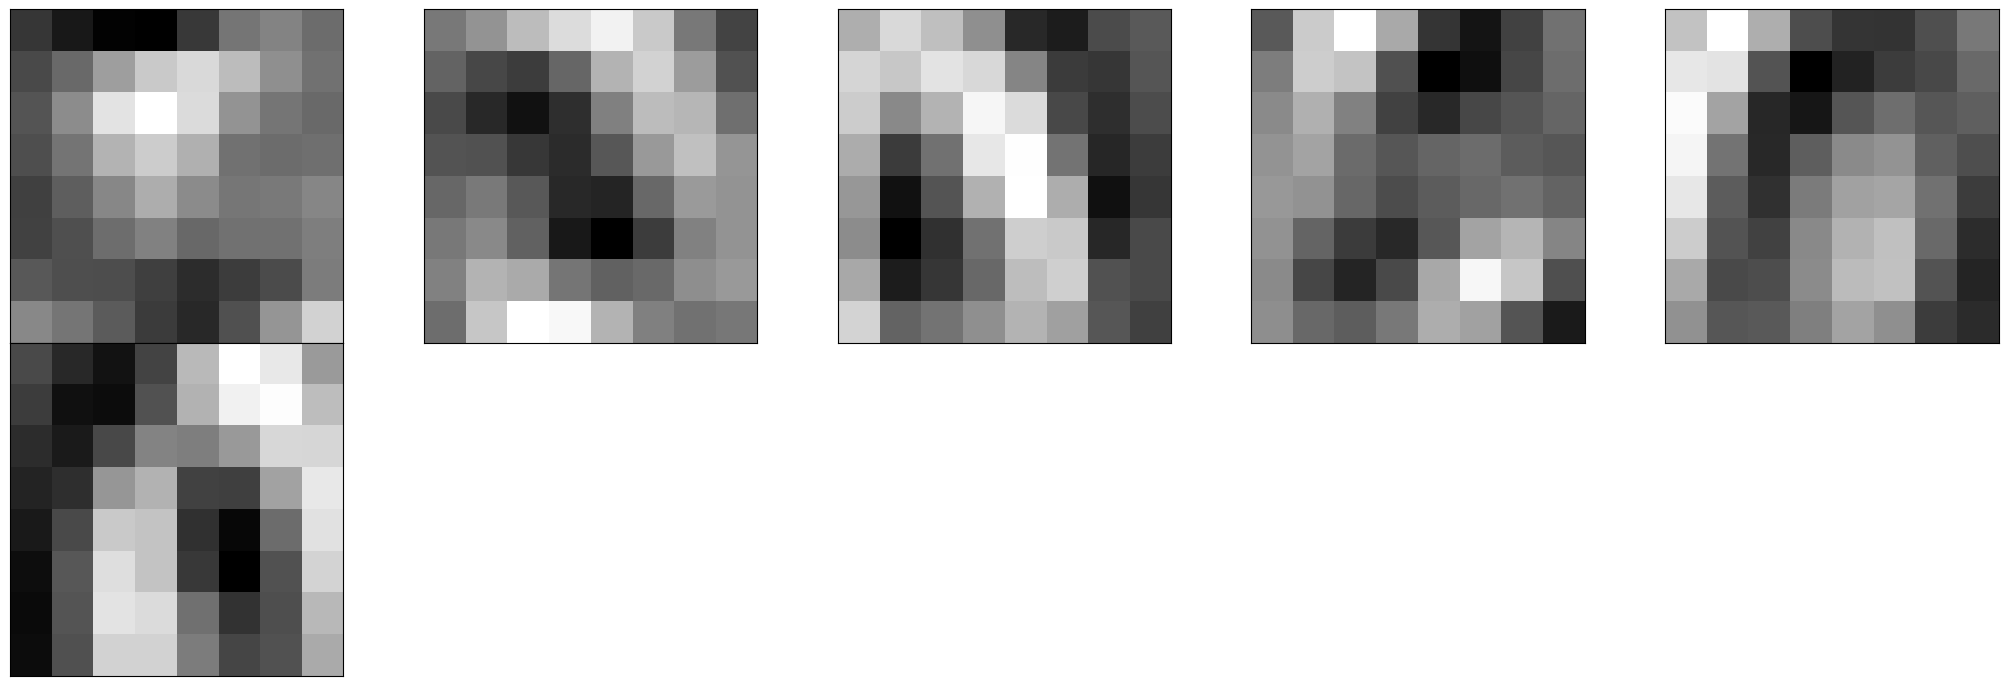

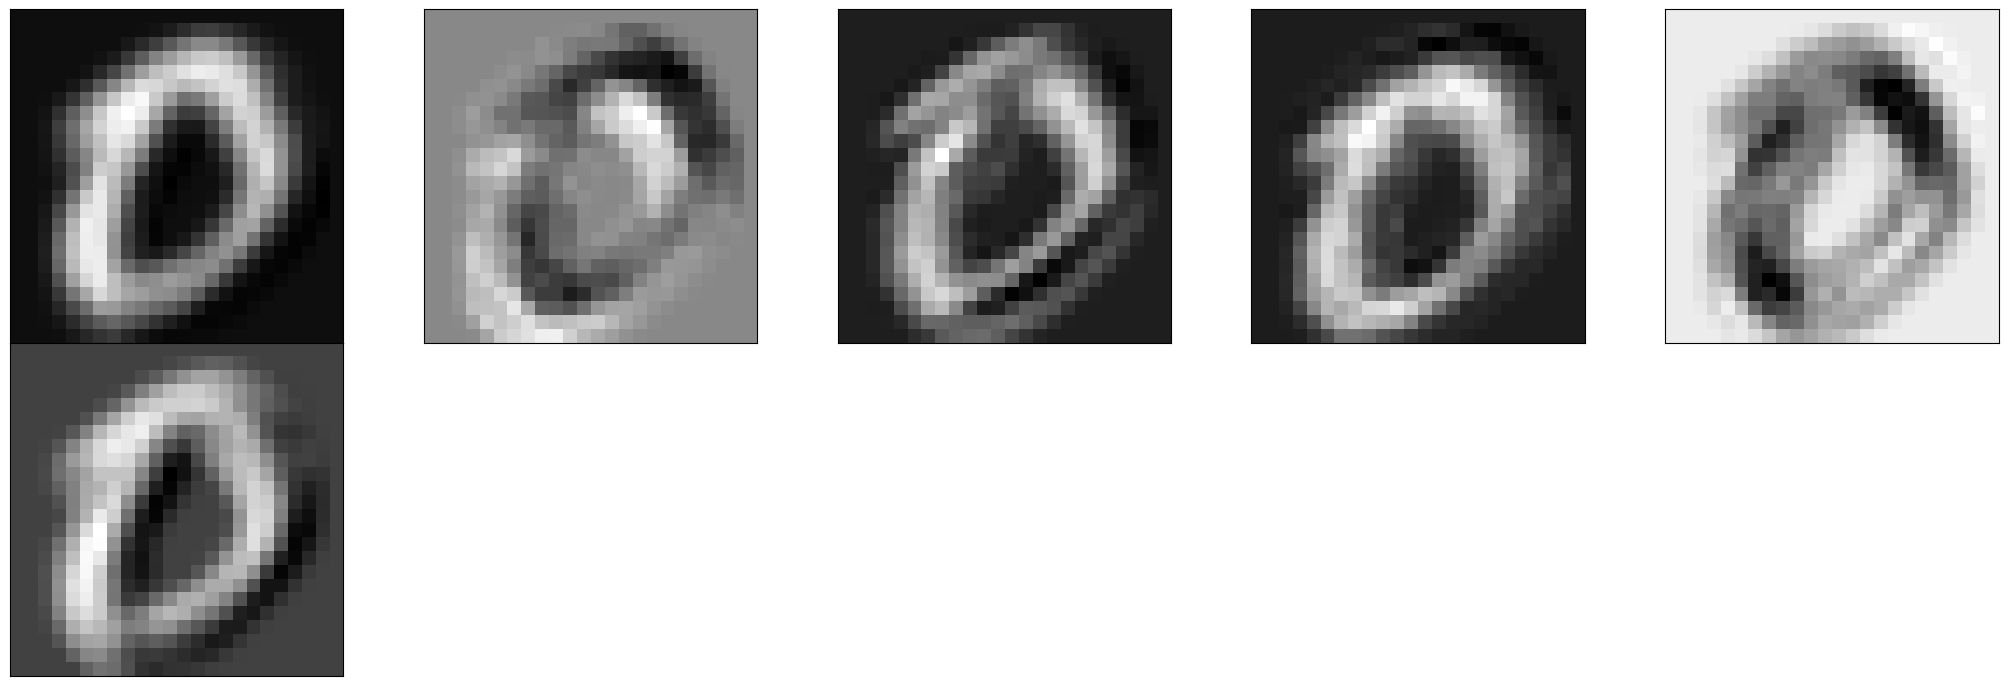

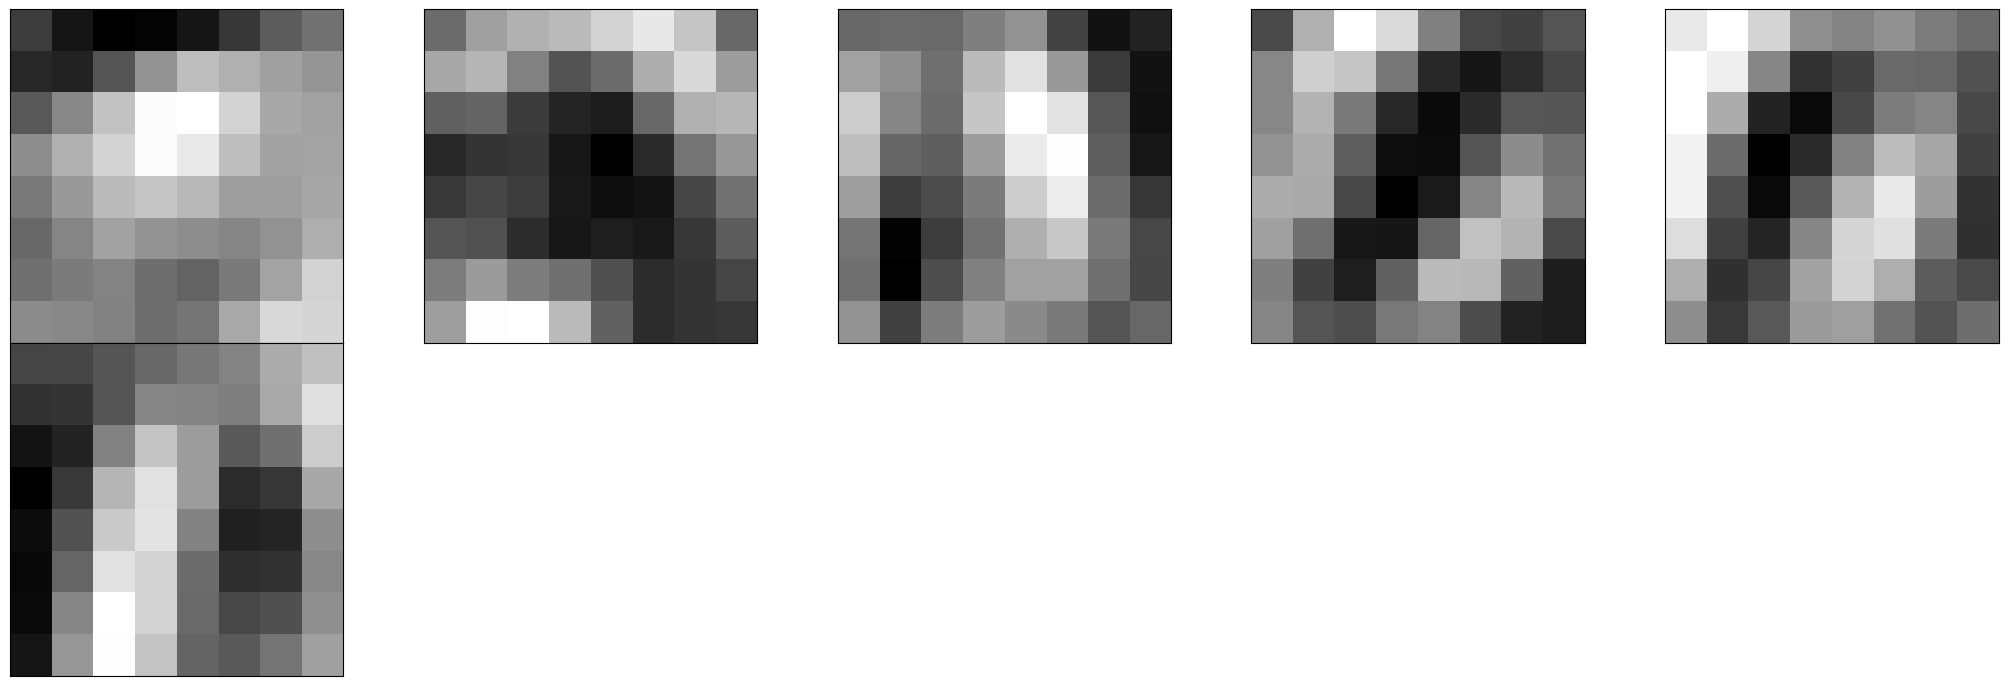

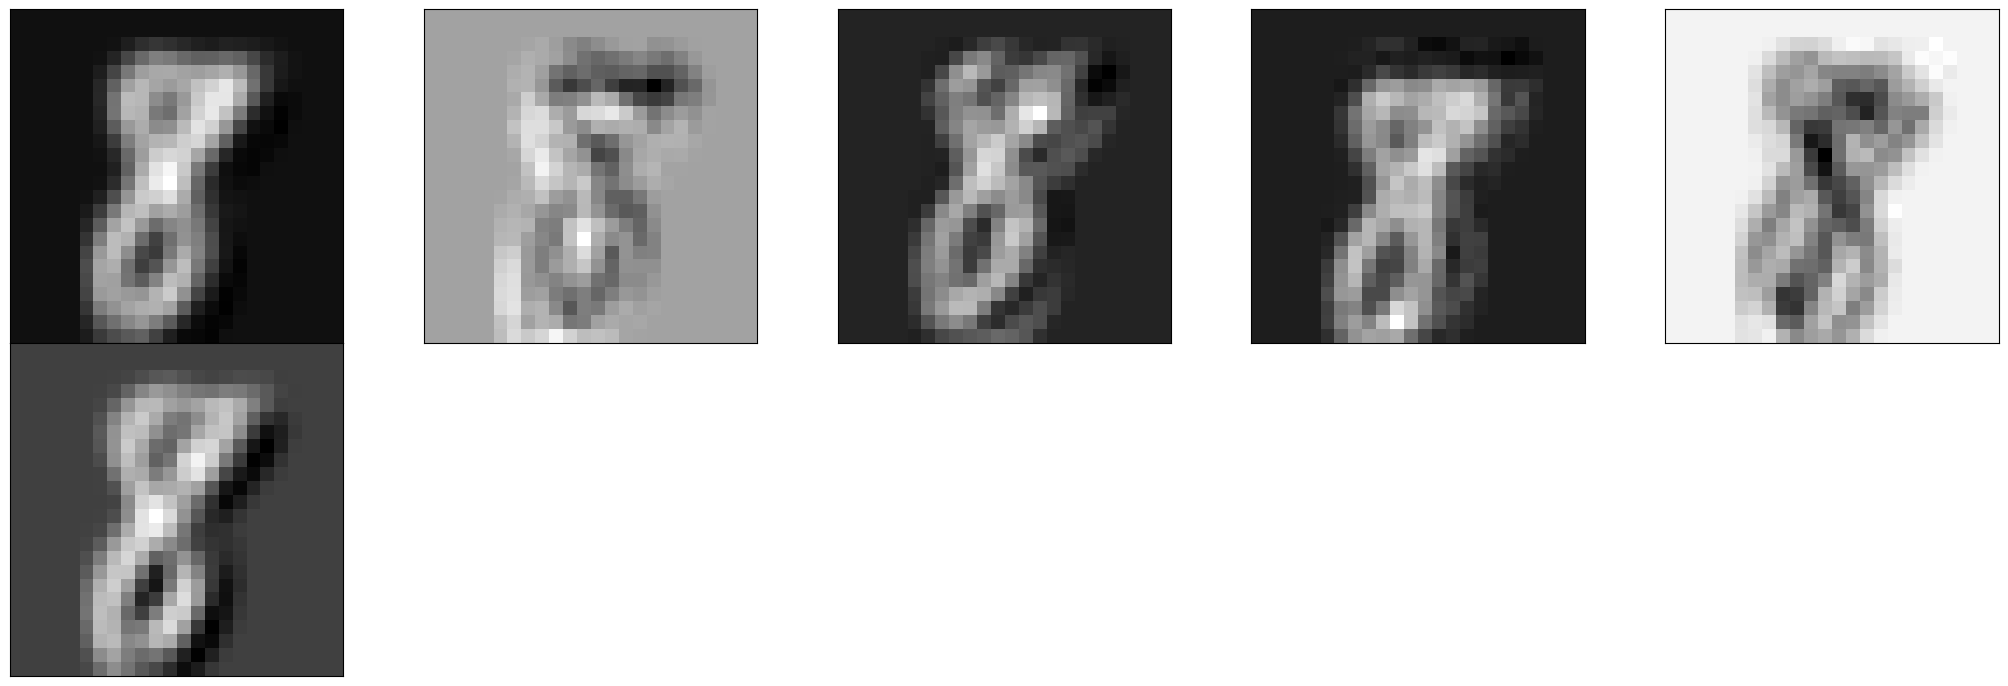

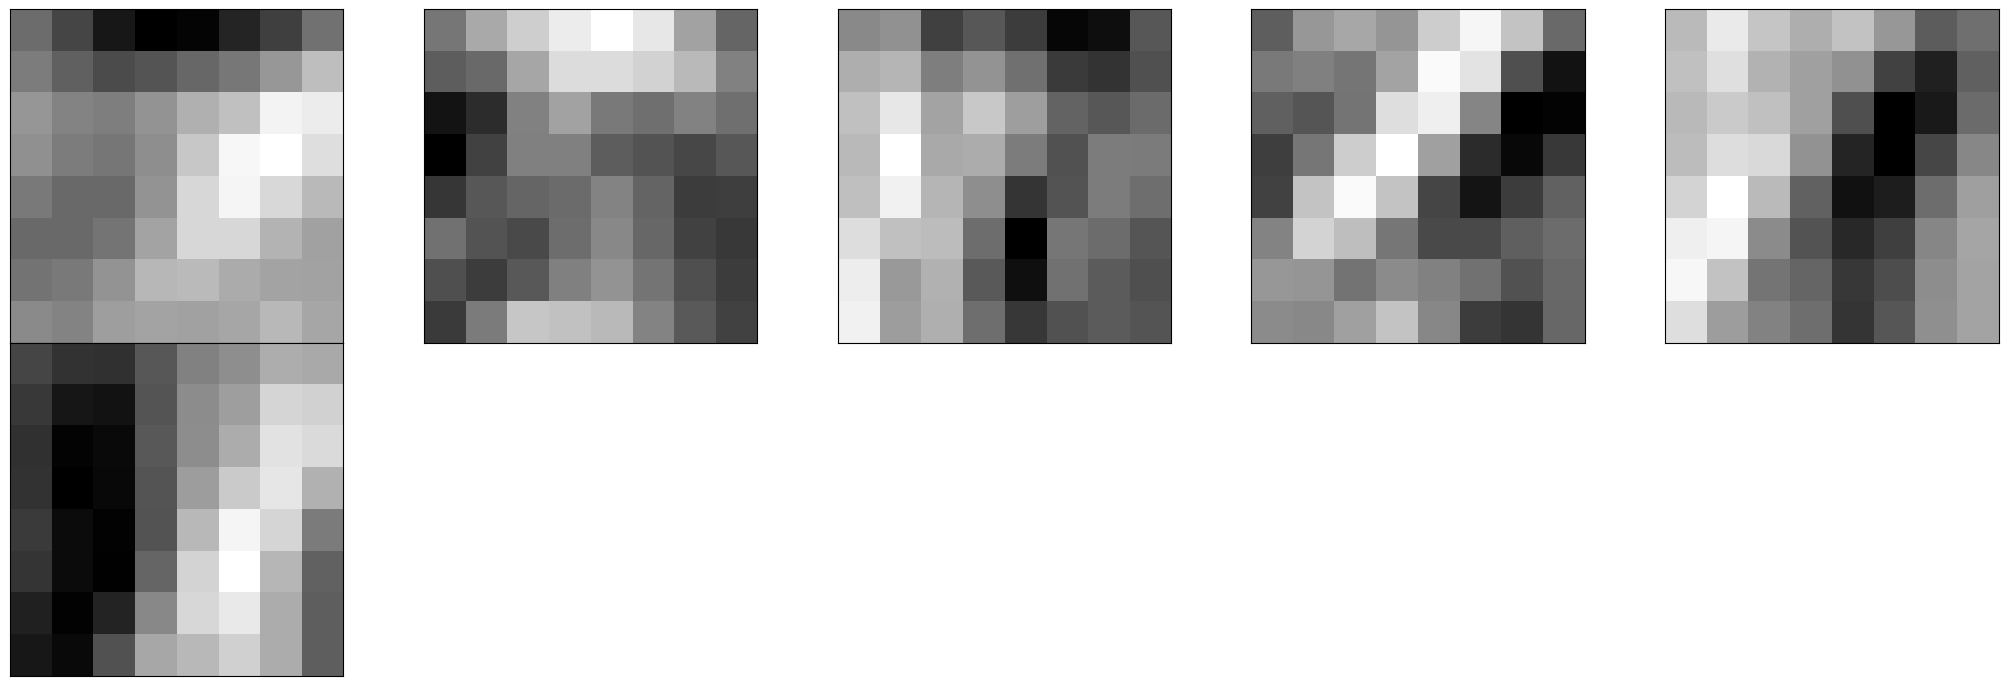

In [49]:
for images, targets in test_loader:
    act= getActivations(model_cnn, model_cnn.conv1, images.to(device))
    act2= getActivations(model_cnn, model_cnn.conv2, images.to(device))
    
    fig = plt.figure(figsize=(20,50))
    fig.subplots_adjust(left=0,right=1,bottom=0,top=0.8,hspace=0, wspace=0.2)
    for i in range(n_features):
        ax = fig.add_subplot(12,5,i+1,xticks=[],yticks=[])
        ax.imshow(act[0][i].cpu().detach().numpy(), cmap=plt.get_cmap('gray'))

    fig = plt.figure(figsize=(20,50))
    fig.subplots_adjust(left=0,right=1,bottom=0,top=0.8,hspace=0, wspace=0.2)
    for i in range(n_features):
        ax = fig.add_subplot(12,5,i+1,xticks=[],yticks=[])
        ax.imshow(act2[0][i].cpu().detach().numpy(), cmap=plt.get_cmap('gray'))

## A more challenging dataset

The MNIST dataset is relatively simple to solve as you can see from the score obtained above. Let's take a look to a more challenging task such as <a href="https://www.cs.toronto.edu/~kriz/cifar.html">CIFAR-10</a>. The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Batch size is 100 for the training set.


In [50]:
input_size  = 32*32   # images are 32x32 pixels
output_size = 10      # there are 10 classes

transform=transforms.Compose([ #normalization on 3 channels
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
        ])

dataset_tr = datasets.CIFAR10('./data', train=True, download=True, transform=transform)
dataset_te = datasets.CIFAR10('./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset_tr,batch_size=100,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset_te, batch_size=1000,shuffle=True)

#load training data
images, labels = next(iter(train_loader))

100%|██████████| 170498071/170498071 [04:37<00:00, 615345.27it/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data


>**Task 5:** adapt the CNN developed for MNIST on the CIFAR-10 dataset and look at the results. Notice that the CIFAR images use 3 channels (RGB) instead of 1 channel (black and white). Run 2 epochs.

In [66]:
class CNN(nn.Module):
    
    def __init__(self, input_size, n_feature, output_size):
        super(CNN, self).__init__()
        self.input_size = input_size
        kernel_size = 5
        self.n_feature = n_feature

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=n_feature, kernel_size=kernel_size)
        self.conv2 = nn.Conv2d(in_channels=n_feature, out_channels=n_feature, kernel_size=kernel_size)
        self.fc1 = nn.Linear(in_features=n_feature*5*5, out_features=50)
        self.fc2 = nn.Linear(in_features=50, out_features=10)
        
        
        
    def forward(self, x, verbose=False):
        #initial dimensions for x will be [100, 3, 32, 32]
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, self.n_feature*5*5)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [67]:
# Training settings 
n_features = 10 # number of feature maps

model_cnn = CNN(input_size, n_features, output_size)
model_cnn.to(device)
optimizer = torch.optim.SGD(model_cnn.parameters(), lr=0.05, momentum=0.5)

for epoch in range(0, 2):
    train(model_cnn, device, train_loader, optimizer, epoch)
    test(model_cnn, device, test_loader)

Train Epoch: 0 [0/50000 (0%)]	Loss: 2.309399
Train Epoch: 0 [10000/50000 (20%)]	Loss: 1.807124
Train Epoch: 0 [20000/50000 (40%)]	Loss: 1.520185
Train Epoch: 0 [30000/50000 (60%)]	Loss: 1.710455
Train Epoch: 0 [40000/50000 (80%)]	Loss: 1.517414

Test set: Average loss: 1.4922, Accuracy: 4502/10000 (45%)

Train Epoch: 1 [0/50000 (0%)]	Loss: 1.739363
Train Epoch: 1 [10000/50000 (20%)]	Loss: 1.365961
Train Epoch: 1 [20000/50000 (40%)]	Loss: 1.438804
Train Epoch: 1 [30000/50000 (60%)]	Loss: 1.179268
Train Epoch: 1 [40000/50000 (80%)]	Loss: 1.210801

Test set: Average loss: 1.3135, Accuracy: 5246/10000 (52%)

